In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style("whitegrid", {'axes.grid' : False})
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)


### 1.Read file and Tranform

In [3]:
df = pd.read_csv('crawled_data_dientu(17-11-2022).csv')
df.head()

,id,sku,short_description,Tên SP,price,Quantity_sold,list_price,price_usd,discount,discount_rate,review_count,order_count,inventory_status,is_visible,rating_avg,brand_name,Date
0,110791834,6706874410555,NORTH BAYOUđược thành lập vào năm 2006. Chuyên...,Giá Treo Màn Hình Máy Tính North Bayou F80 Lắp...,291700,NaN,291700,NaN,0,0,0,NaN,available,NaN,0.0,"{'id': 168073, 'name': 'North Bayou', 'slug': ...",2022-11-17
1,54763799,1469531001006,Tiết Kiệm Điện NăngDigital InverterTiết kiệm đ...,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0H...,5689000,1462.0,8990000,NaN,3301000,37,434,NaN,available,NaN,4.7,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams...",2022-11-17
2,47088265,3484820674196,Ấn tượng xanh đầu tiên của chiếc máy lạnh treo...,Máy Lạnh Sharp 1.5Hp Inverter AH-X12XEW - HÀNG...,7549000,159.0,9990000,NaN,2441000,24,50,NaN,available,NaN,4.5,"{'id': 19912, 'name': 'Sharp', 'slug': 'sharp'}",2022-11-17
3,196827627,3088517136710,"Thiết kế đẹp mắt, âm thanh chất lượngTivi Xiao...",Android Tivi Xiaomi Full HD 43 inch A2 L43M7-E...,5559900,41.0,6900000,NaN,1340100,19,12,NaN,available,NaN,4.7,"{'id': 25422, 'name': 'Xiaomi', 'slug': 'xiaomi'}",2022-11-17
4,53639849,1348854660926,Ngăn chặn mùi hôi khó chịu với bộ lọc than hoạ...,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L)...,5440000,40.0,5440000,NaN,0,0,4,NaN,available,NaN,5.0,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams...",2022-11-17


In [4]:
# !pip install missingno
# import missingno as msno
# msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   sku                2000 non-null   int64  
 2   short_description  2000 non-null   object 
 3   Tên SP             2000 non-null   object 
 4   price              2000 non-null   int64  
 5   Quantity_sold      1547 non-null   float64
 6   list_price         2000 non-null   int64  
 7   price_usd          0 non-null      float64
 8   discount           2000 non-null   int64  
 9   discount_rate      2000 non-null   int64  
 10  review_count       2000 non-null   int64  
 11  order_count        0 non-null      float64
 12  inventory_status   2000 non-null   object 
 13  is_visible         0 non-null      float64
 14  rating_avg         2000 non-null   float64
 15  brand_name         2000 non-null   object 
 16  Date               2000 

In [6]:
# df['sku']=df['sku'].astype(str)

In [7]:
df_product = pd.read_csv('crawled_data_dientu(30-12-2022).csv')


In [8]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   sku                2000 non-null   int64  
 2   short_description  2000 non-null   object 
 3   Tên SP             2000 non-null   object 
 4   price              2000 non-null   int64  
 5   Quantity_sold      1652 non-null   float64
 6   list_price         2000 non-null   int64  
 7   price_usd          0 non-null      float64
 8   discount           2000 non-null   int64  
 9   discount_rate      2000 non-null   int64  
 10  review_count       2000 non-null   int64  
 11  order_count        0 non-null      float64
 12  inventory_status   2000 non-null   object 
 13  is_visible         0 non-null      float64
 14  rating_avg         2000 non-null   float64
 15  brand_name         1999 non-null   object 
 16  Date               2000 

### Merge two Dataframe

In [9]:
df_mer = df.merge(df_product,how ='inner',on='sku')

In [10]:
#  column of data after merge
df_mer.columns

Index(['id_x', 'sku', 'short_description_x', 'Tên SP_x', 'price_x',
       'Quantity_sold_x', 'list_price_x', 'price_usd_x', 'discount_x',
       'discount_rate_x', 'review_count_x', 'order_count_x',
       'inventory_status_x', 'is_visible_x', 'rating_avg_x', 'brand_name_x',
       'Date_x', 'id_y', 'short_description_y', 'Tên SP_y', 'price_y',
       'Quantity_sold_y', 'list_price_y', 'price_usd_y', 'discount_y',
       'discount_rate_y', 'review_count_y', 'order_count_y',
       'inventory_status_y', 'is_visible_y', 'rating_avg_y', 'brand_name_y',
       'Date_y'],
      dtype='object')

In [11]:
df_mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1142 entries, 0 to 1141
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_x                 1142 non-null   int64  
 1   sku                  1142 non-null   int64  
 2   short_description_x  1142 non-null   object 
 3   Tên SP_x             1142 non-null   object 
 4   price_x              1142 non-null   int64  
 5   Quantity_sold_x      912 non-null    float64
 6   list_price_x         1142 non-null   int64  
 7   price_usd_x          0 non-null      float64
 8   discount_x           1142 non-null   int64  
 9   discount_rate_x      1142 non-null   int64  
 10  review_count_x       1142 non-null   int64  
 11  order_count_x        0 non-null      float64
 12  inventory_status_x   1142 non-null   object 
 13  is_visible_x         0 non-null      float64
 14  rating_avg_x         1142 non-null   float64
 15  brand_name_x         1142 non-null   o

#### Transform column brand name

In [12]:
df_mer['brand_name_x'] = df_mer['brand_name_x'].apply(lambda x:x.split(',')[1].split(':')[1].replace("'","").strip())

In [13]:
def range_price(x):   
    if x <1000000:
        return "<1 tr"
    elif x < 1500000:
        return " 1tr - 1,5tr"
    elif x<2000000:
        return "1,5tr - 2tr"
    elif x <2500000:
        return " 2tr - 2,5tr"
    elif x < 3000000:
        return "2,5tr - 3tr"
    elif x <3500000:
        return " 3tr - 3,5tr"
    elif x<4000000:
        return "3,5tr - 4tr"
    elif x < 4500000:
        return "4tr - 4,5tr "
    elif x < 5000000:
        return "4,5tr - 5tr"  
    else:
        return ">5tr"
   

In [14]:
df_mer['price_new'] = (df_mer['price_x'] + df_mer['price_y'])/2

In [15]:
df_mer['range_price_']=df_mer['price_new'].apply(range_price)

In [16]:
df_mer[['Tên SP_y','price_x','price_y','brand_name_x','brand_name_y','Quantity_sold_x','Quantity_sold_y']].head(10)

,Tên SP_y,price_x,price_y,brand_name_x,brand_name_y,Quantity_sold_x,Quantity_sold_y
0,Giá Treo Màn Hình Máy Tính North Bayou F80 Lắp...,291700,685000,North Bayou,"{'id': 168073, 'name': 'North Bayou', 'slug': ...",NaN,193.0
1,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0H...,5689000,5849000,Samsung,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams...",1462.0,1526.0
2,Máy Lạnh Sharp 1.5Hp Inverter AH-X12XEW - HÀNG...,7549000,7459000,Sharp,"{'id': 19912, 'name': 'Sharp', 'slug': 'sharp'}",159.0,172.0
3,Android Tivi Xiaomi Full HD 43 inch A2 L43M7-E...,5559900,5489300,Xiaomi,"{'id': 25422, 'name': 'Xiaomi', 'slug': 'xiaomi'}",41.0,83.0
4,Máy Rửa Bát Electrolux ESF6010BW - Hàng chính ...,7450000,7429000,Electrolux,"{'id': 19050, 'name': 'Electrolux', 'slug': 'e...",1496.0,1506.0
5,Google Tivi Sony 4K 65 inch KD-65X75K - Model ...,15489900,15009300,Sony,"{'id': 18641, 'name': 'Sony', 'slug': 'sony'}",68.0,89.0
6,Giá Treo Tivi Góc Xoay Nhập Khẩu North Bayou P...,499000,485000,North Bayou,"{'id': 168073, 'name': 'North Bayou', 'slug': ...",39.0,61.0
7,Loa Thanh Samsung 2.1ch 150W HW-T420/XV - Hàng...,1380000,1070000,Samsung,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams...",953.0,NaN
8,Tủ lạnh Samsung Inverter 208 lít RT19M300BGS/SV,4830000,4899000,Samsung,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams...",2.0,952.0
9,[Sản phẩm mới nhất 2022] GOOGLE Tivi 43'' 4K H...,7272000,7072000,TCL,"{'id': 27932, 'name': 'TCL', 'slug': 'tcl'}",16.0,32.0


#### fillna equal 0


In [17]:
df_mer = df_mer.fillna(0)
df_mer.head()

,id_x,sku,short_description_x,Tên SP_x,price_x,Quantity_sold_x,list_price_x,price_usd_x,discount_x,discount_rate_x,...,discount_rate_y,review_count_y,order_count_y,inventory_status_y,is_visible_y,rating_avg_y,brand_name_y,Date_y,price_new,range_price_
0,110791834,6706874410555,NORTH BAYOUđược thành lập vào năm 2006. Chuyên...,Giá Treo Màn Hình Máy Tính North Bayou F80 Lắp...,291700,0.0,291700,0.0,0,0,...,5,51,0.0,available,0.0,4.7,"{'id': 168073, 'name': 'North Bayou', 'slug': ...",2022-12-30,488350.0,<1 tr
1,54763799,1469531001006,Tiết Kiệm Điện NăngDigital InverterTiết kiệm đ...,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0H...,5689000,1462.0,8990000,0.0,3301000,37,...,35,443,0.0,available,0.0,4.7,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams...",2022-12-30,5769000.0,>5tr
2,47088265,3484820674196,Ấn tượng xanh đầu tiên của chiếc máy lạnh treo...,Máy Lạnh Sharp 1.5Hp Inverter AH-X12XEW - HÀNG...,7549000,159.0,9990000,0.0,2441000,24,...,25,53,0.0,available,0.0,4.5,"{'id': 19912, 'name': 'Sharp', 'slug': 'sharp'}",2022-12-30,7504000.0,>5tr
3,196827627,3088517136710,"Thiết kế đẹp mắt, âm thanh chất lượngTivi Xiao...",Android Tivi Xiaomi Full HD 43 inch A2 L43M7-E...,5559900,41.0,6900000,0.0,1340100,19,...,20,18,0.0,available,0.0,4.7,"{'id': 25422, 'name': 'Xiaomi', 'slug': 'xiaomi'}",2022-12-30,5524600.0,>5tr
4,10003165,9379006525321,Máy Rửa Chén Electrolux ESF6010BW công suất 9 ...,Máy Rửa Bát Electrolux ESF6010BW - Hàng chính ...,7450000,1496.0,9990000,0.0,2540000,25,...,26,415,0.0,available,0.0,4.3,"{'id': 19050, 'name': 'Electrolux', 'slug': 'e...",2022-12-30,7439500.0,>5tr


In [18]:
df_mer = df_mer[['Tên SP_y','price_x','price_y','brand_name_x','Quantity_sold_x','Quantity_sold_y','range_price_']]


##### Create column calculate diffence quantity sold by two month

In [19]:
df_mer['dif_quantity'] = df_mer['Quantity_sold_y']- df_mer['Quantity_sold_x']
df_mer_filna = df_mer[df_mer['dif_quantity'] > 0]

In [20]:
df_mer_filna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 1139
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tên SP_y         733 non-null    object 
 1   price_x          733 non-null    int64  
 2   price_y          733 non-null    int64  
 3   brand_name_x     733 non-null    object 
 4   Quantity_sold_x  733 non-null    float64
 5   Quantity_sold_y  733 non-null    float64
 6   range_price_     733 non-null    object 
 7   dif_quantity     733 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 51.5+ KB


#### <font color='green'>Top 15 brand have most quantity by month</font> 

In [21]:
# pd.options.display.float_format = '{:,.2f} Item'.format
Top_15_month = df_mer_filna.groupby('brand_name_x').agg({'dif_quantity':'sum'}).reset_index().sort_values(by='dif_quantity',ascending=False).head(15)
Top_15_month

,brand_name_x,dif_quantity
67,OEM,2321.0
80,Samsung,1706.0
66,North Bayou,528.0
35,Ferroli,518.0
53,LG,312.0
84,Sony,271.0
9,Ariston,241.0
32,Electrolux,237.0
112,Xiaomi,232.0
83,Sharp,144.0


In [23]:
df_mer_filna.columns

Index(['Tên SP_y', 'price_x', 'price_y', 'brand_name_x', 'Quantity_sold_x',
       'Quantity_sold_y', 'range_price_', 'dif_quantity'],
      dtype='object')

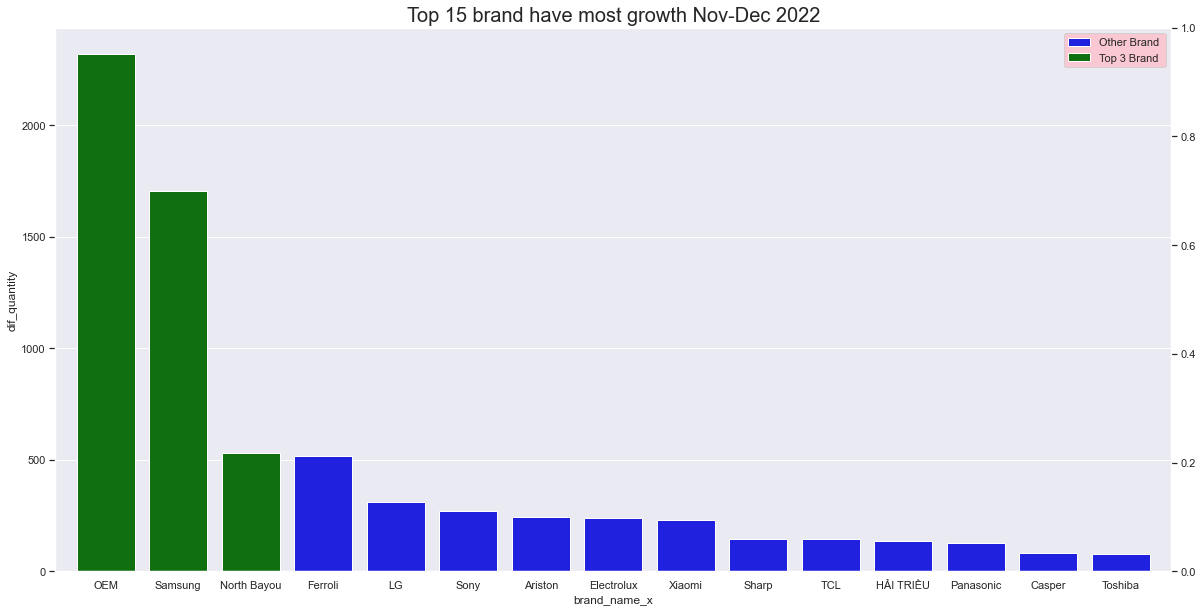

In [113]:
top_3 = Top_15_month.iloc[0:3,1].to_list()
colors = ['blue' if bar in top_3 else 'green' for bar in Top_15_month['dif_quantity']]
colors_ = ['green' if bar in top_3 else 'blue' for bar in Top_15_month['dif_quantity']]

fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
g=sns.barplot(x='brand_name_x',y='dif_quantity',data=Top_15_month,palette =colors,ax= ax,label='Other Brand')
g=sns.barplot(x='brand_name_x',y='dif_quantity',data=Top_15_month,ax= ax,palette= colors_,label='Top 3 Brand ')
ax.set_title("Top 15 brand have most growth Nov-Dec 2022",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) 
ax.margins(x=0.02)
plt.show()

In [105]:
# calculate Quantity sold by each range price
Group_range_price=df_mer_filna.groupby('range_price_').agg({'dif_quantity':'sum'}).reset_index().sort_values(by='dif_quantity',ascending= False)
Group_range_price

,range_price_,dif_quantity
8,<1 tr,3803.0
9,>5tr,1746.0
6,"4,5tr - 5tr",1102.0
4,"2,5tr - 3tr",612.0
3,"1,5tr - 2tr",225.0
5,"3,5tr - 4tr",171.0
2,"3tr - 3,5tr",164.0
0,"1tr - 1,5tr",135.0
1,"2tr - 2,5tr",109.0
7,"4tr - 4,5tr",33.0


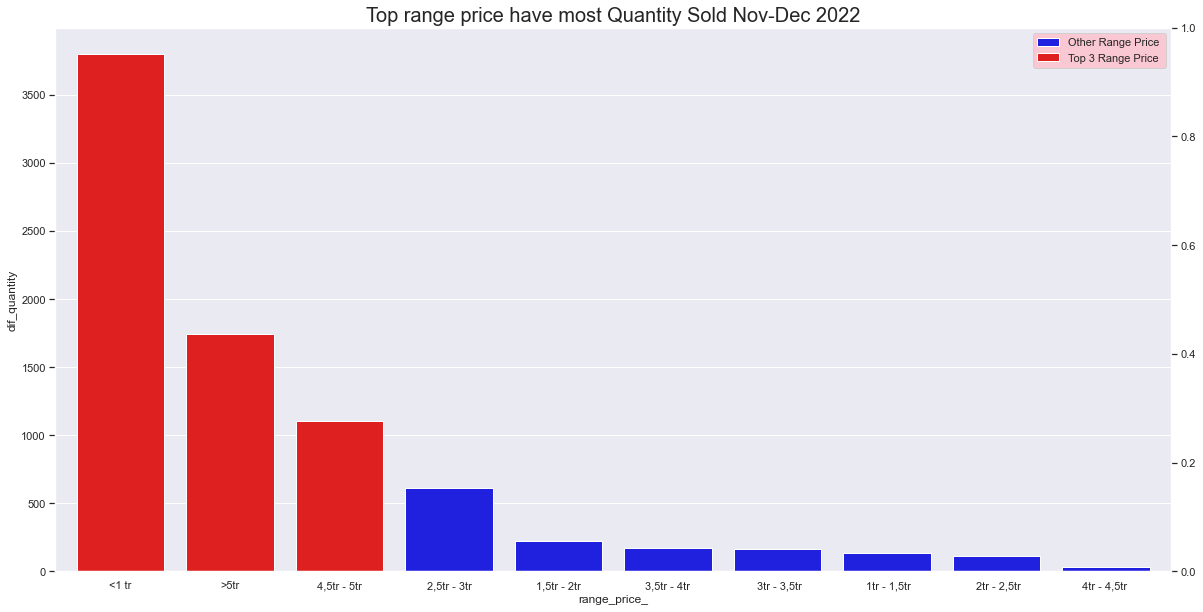

In [111]:
top_3 = Group_range_price.iloc[0:3,1].to_list()
colors = ['blue' if bar in top_3 else 'green' for bar in Group_range_price['dif_quantity']]
colors_ = ['red' if bar in top_3 else 'blue' for bar in Group_range_price['dif_quantity']]

fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
g=sns.barplot(x='range_price_',y='dif_quantity',data=Group_range_price,palette =colors,ax= ax,label='Other Range Price')
g=sns.barplot(x='range_price_',y='dif_quantity',data=Group_range_price,ax= ax,palette= colors_,label='Top 3 Range Price ')

# g=sns.lineplot(x='brand_name',y='price',data=gr_quanti_brand,marker='o', ax=ax2 ,label="price" )
ax.set_title("Top range price have most Quantity Sold Nov-Dec 2022",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

In [27]:
#  Người tiêu dùng có xu hướng mua những món đồ có giá trị nhỏ hơn 1 triệu và từ khoảng 4,5 triệu trở lên nhiều trong ngành hàng điện tử.
#  Những món đồ có giá trị thấp hơn 1 triệu được mua nhiều vì trên kênh online mọi người thường sẽ không chi quá nhiều tiền, e ngại rủi ro về chất lượng sản phẩm cho các món đồ để giảm thiểu rủi ro về hàng hóa.
#  Còn đối với những sản phẩm có giá trị lớn từ 4,5 triệu trở lên thì chắc chắn đây sẽ là những thương hiệu uy tín mà việc mua hàng online không có nhiều rủi ro về chất lượng, bảo trì.

#### <font color='green'>Top 15 product have most quantity by month</font> 

In [28]:
df_mer_filna.groupby('Tên SP_y').agg({'dif_quantity':'sum'}).reset_index().sort_values(by='dif_quantity',ascending=False).head(15)


,Tên SP_y,dif_quantity
605,Tủ lạnh Samsung Inverter 208 lít RT19M300BGS/SV,950.0
333,Máy Nước Nóng Ferroli Divo SSP 4.5S (4500W),489.0
144,Giá Treo Màn Hình Máy Tính North Bayou F80 Lắp...,193.0
441,Remote Đa Năng Điều Khiển Nhiều Model Máy Lạnh...,174.0
470,"Remote Điều Khiển Dùng Cho Smart TV, Internet ...",138.0
269,Mic cài áo,118.0
2,Micro Rời Cho Máy Trợ Giảng (Jack 3.5 Đen),85.0
462,"Remote Điều Khiển Dành Cho Smart TV LG, Intern...",75.0
37,Android Tivi Xiaomi HD 32 inch A2 L32M7-EAVN -...,74.0
163,Giá treo màn hình máy tính Cao Cấp NB F100A 22...,67.0


In [29]:
# samsung là thương hiệu có số lượng mua nhiều giữa tháng 11 đến nửa cuối tháng 12 năm 2022
# Đa sô các sản phẩm còn lại là phụ kiện remote điều kiển được mua nhiều có thể trong mùa WC, có nhiều giải đấu hay nên điều khiển sử dụng nhiều dễ bị hỏng.
#  Đây là thời điểm cuối năm, có thể nhiều gia đình có nhu cầu đổi mới tủ lạnh  

In [30]:
df.shape

(2000, 17)

In [32]:
col = ['Tên SP','price','Quantity_sold','list_price','discount','discount_rate','review_count','rating_avg','brand_name']
df1 = df[col]
df1.head()

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name
0,Giá Treo Màn Hình Máy Tính North Bayou F80 Lắp...,291700,NaN,291700,0,0,0,0.0,"{'id': 168073, 'name': 'North Bayou', 'slug': ..."
1,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0H...,5689000,1462.0,8990000,3301000,37,434,4.7,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams..."
2,Máy Lạnh Sharp 1.5Hp Inverter AH-X12XEW - HÀNG...,7549000,159.0,9990000,2441000,24,50,4.5,"{'id': 19912, 'name': 'Sharp', 'slug': 'sharp'}"
3,Android Tivi Xiaomi Full HD 43 inch A2 L43M7-E...,5559900,41.0,6900000,1340100,19,12,4.7,"{'id': 25422, 'name': 'Xiaomi', 'slug': 'xiaomi'}"
4,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L)...,5440000,40.0,5440000,0,0,4,5.0,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams..."


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tên SP         2000 non-null   object 
 1   price          2000 non-null   int64  
 2   Quantity_sold  1547 non-null   float64
 3   list_price     2000 non-null   int64  
 4   discount       2000 non-null   int64  
 5   discount_rate  2000 non-null   int64  
 6   review_count   2000 non-null   int64  
 7   rating_avg     2000 non-null   float64
 8   brand_name     2000 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 140.8+ KB


In [34]:
# Quantity sold have most NaN values

In [35]:
# one data point value of brand column
a = df1.loc[0,'brand_name']
a

"{'id': 168073, 'name': 'North Bayou', 'slug': 'north-bayou'}"

#### 2.cleaning column brand_name 

In [37]:
df1['brand_name'] = df1['brand_name'].apply(lambda x:x.split(',')[1].split(':')[1].replace("'","").strip())

<ipython-input-37-7928de09ea89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['brand_name'] = df1['brand_name'].apply(lambda x:x.split(',')[1].split(':')[1].replace("'","").strip())


#### 3.Trasfrom Tên SP

In [38]:
df1['Tên SP'] = df1['Tên SP'].apply(lambda x:x.split('-')[0].strip())

<ipython-input-38-37dc99912b34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tên SP'] = df1['Tên SP'].apply(lambda x:x.split('-')[0].strip())


In [39]:
df1.head()

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name
0,Giá Treo Màn Hình Máy Tính North Bayou F80 Lắp...,291700,NaN,291700,0,0,0,0.0,North Bayou
1,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),5689000,1462.0,8990000,3301000,37,434,4.7,Samsung
2,Máy Lạnh Sharp 1.5Hp Inverter AH,7549000,159.0,9990000,2441000,24,50,4.5,Sharp
3,Android Tivi Xiaomi Full HD 43 inch A2 L43M7,5559900,41.0,6900000,1340100,19,12,4.7,Xiaomi
4,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L),5440000,40.0,5440000,0,0,4,5.0,Samsung


In [40]:
df2= df1.dropna()
df2.head()

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name
1,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),5689000,1462.0,8990000,3301000,37,434,4.7,Samsung
2,Máy Lạnh Sharp 1.5Hp Inverter AH,7549000,159.0,9990000,2441000,24,50,4.5,Sharp
3,Android Tivi Xiaomi Full HD 43 inch A2 L43M7,5559900,41.0,6900000,1340100,19,12,4.7,Xiaomi
4,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L),5440000,40.0,5440000,0,0,4,5.0,Samsung
5,Máy Rửa Bát Electrolux ESF6010BW,7450000,1496.0,9990000,2540000,25,411,4.3,Electrolux


In [41]:
df2['Tên SP'] = df2['Tên SP'].apply(lambda x :x.split('-')[0])

<ipython-input-41-5491a50dc299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tên SP'] = df2['Tên SP'].apply(lambda x :x.split('-')[0])


###  <font color='green'>3.plot visual</font> 

###  <font color='green'>Relationship between price and Quantity sold </font> 


In [42]:
# funtion return range price 
def range_price(x):   
    if x <1000000:
        return "<1 tr"
    elif x < 1500000:
        return " 1tr - 1,5 tr"
    elif x<2000000:
        return "1,5tr - 2 tr"
    elif x <2500000:
        return "2tr - 2,5tr"
    elif x < 3000000:
        return "2,5tr - 3 tr"
    elif x <3500000:
        return "3tr - 3,5tr"
    elif x<4000000:
        return "3,5tr - 4 tr"
    elif x < 4500000:
        return "4tr - 4,5tr "
    elif x < 5000000:
        return "4,5tr - 5 tr"  
    else:
        return ">5tr"
   


In [43]:
df2['range_price_'] = df2['price'].apply(range_price)

<ipython-input-43-8efa474b4a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['range_price_'] = df2['price'].apply(range_price)


In [44]:
df2.head()

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
1,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),5689000,1462.0,8990000,3301000,37,434,4.7,Samsung,>5tr
2,Máy Lạnh Sharp 1.5Hp Inverter AH,7549000,159.0,9990000,2441000,24,50,4.5,Sharp,>5tr
3,Android Tivi Xiaomi Full HD 43 inch A2 L43M7,5559900,41.0,6900000,1340100,19,12,4.7,Xiaomi,>5tr
4,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L),5440000,40.0,5440000,0,0,4,5.0,Samsung,>5tr
5,Máy Rửa Bát Electrolux ESF6010BW,7450000,1496.0,9990000,2540000,25,411,4.3,Electrolux,>5tr


In [45]:
Quantity_range_price =df2.groupby('range_price_').agg({'Quantity_sold':'sum'}).reset_index().sort_values(by='Quantity_sold',ascending=False)
Quantity_range_price

,range_price_,Quantity_sold
8,<1 tr,29458.0
9,>5tr,22881.0
1,"1,5tr - 2 tr",12204.0
6,"4,5tr - 5 tr",5516.0
0,"1tr - 1,5 tr",3614.0
3,"2tr - 2,5tr",3584.0
4,"3,5tr - 4 tr",2802.0
2,"2,5tr - 3 tr",2652.0
7,"4tr - 4,5tr",2181.0
5,"3tr - 3,5tr",1166.0


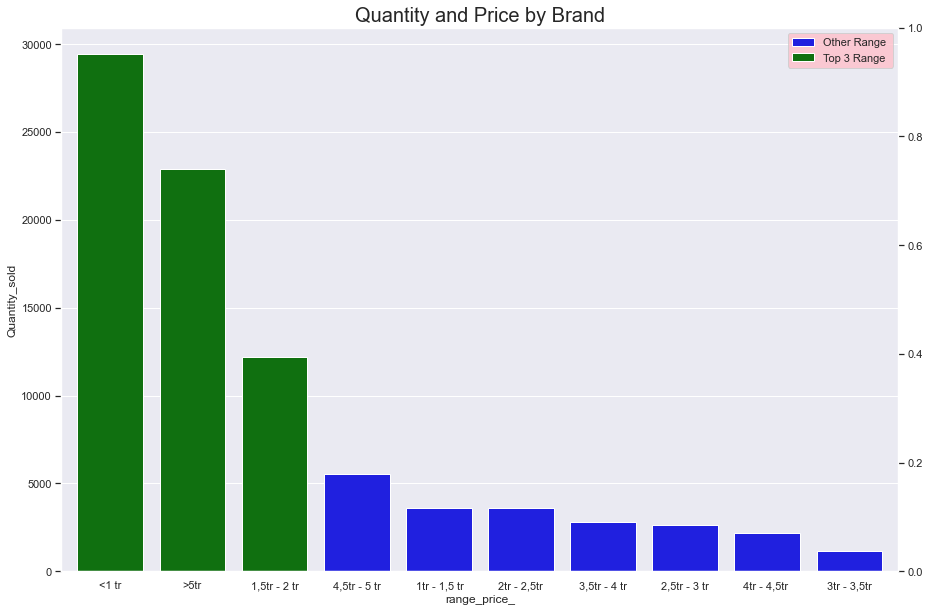

In [47]:
top_3 = Quantity_range_price.iloc[0:3,1].to_list()
colors = ['blue' if bar in top_3 else 'green' for bar in Quantity_range_price['Quantity_sold']]
colors_ = ['green' if bar in top_3 else 'blue' for bar in Quantity_range_price['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='range_price_',y='Quantity_sold',data=Quantity_range_price,palette =colors,ax= ax,label='Other Range')
g=sns.barplot(x='range_price_',y='Quantity_sold',data=Quantity_range_price,ax= ax,palette= colors_,label='Top 3 Range ')

# g=sns.lineplot(x='brand_name',y='price',data=gr_quanti_brand,marker='o', ax=ax2 ,label="price" )
ax.set_title("Quantity and Price by Brand",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

###  <font color='green'>2.Descriptive Statistic </font> 


#### 2.1 Correlation of variables

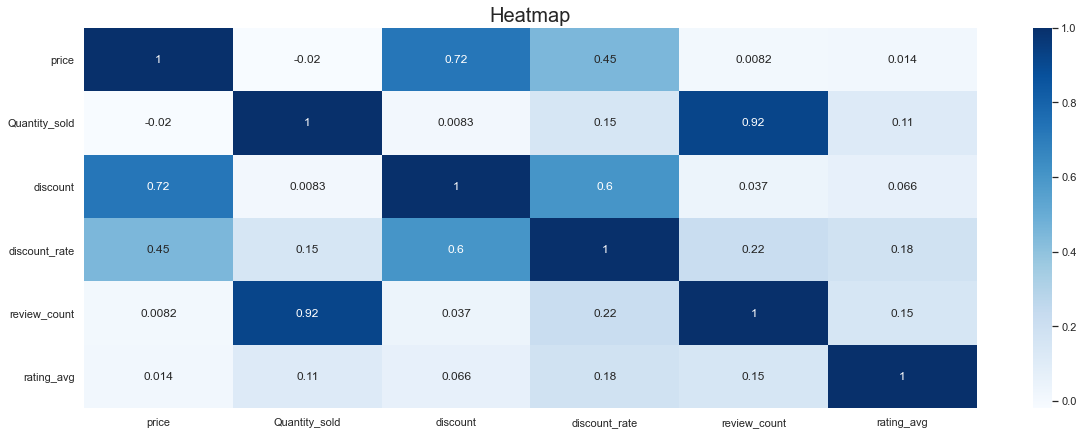

In [48]:
cor = df2[['price','Quantity_sold','discount','discount_rate','review_count','rating_avg']].corr()
b=sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
# .set(title='Heatmap',fontsize=15)
b.set_title("Heatmap",fontsize=20)
plt.gcf().set_size_inches(20,7)

#### 2.2 Correlation Quantity Sold with other variable

In [49]:
cor = df2[['price','Quantity_sold','discount','discount_rate','review_count','rating_avg']]
round(cor.corr()['Quantity_sold']*100,2)

price             -1.97
Quantity_sold    100.00
discount           0.83
discount_rate     15.04
review_count      91.92
rating_avg        11.29
Name: Quantity_sold, dtype: float64

Conclued: Quantity sold have strongly correlation with review_count, discount_rate and rating_avg

In [50]:
cor.corr()['Quantity_sold'].reset_index().style.highlight_max(color='green')

,index,Quantity_sold
0,price,-0.019725
1,Quantity_sold,1.000000
2,discount,0.008269
3,discount_rate,0.150449
4,review_count,0.919220
5,rating_avg,0.112894


### 2.2 Plot correlation of Quantity sold with other variable

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 1 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tên SP         1547 non-null   object 
 1   price          1547 non-null   int64  
 2   Quantity_sold  1547 non-null   float64
 3   list_price     1547 non-null   int64  
 4   discount       1547 non-null   int64  
 5   discount_rate  1547 non-null   int64  
 6   review_count   1547 non-null   int64  
 7   rating_avg     1547 non-null   float64
 8   brand_name     1547 non-null   object 
 9   range_price_   1547 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 132.9+ KB


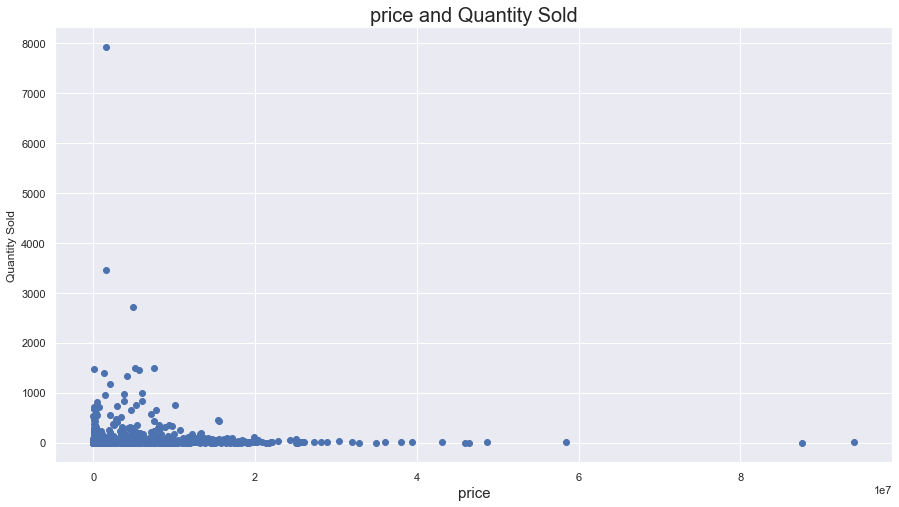

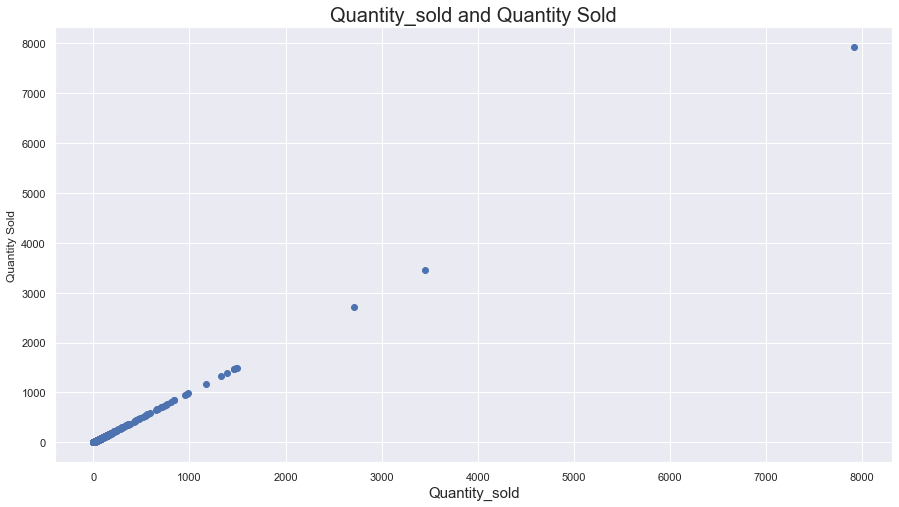

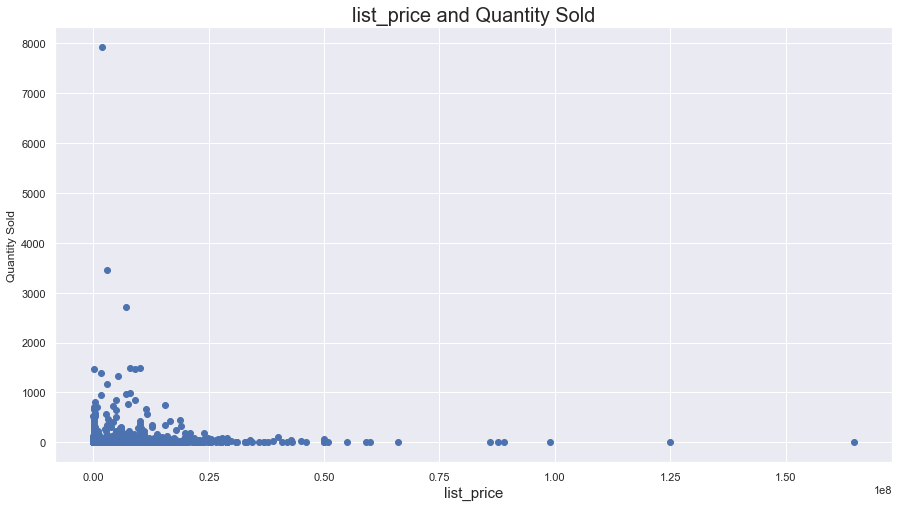

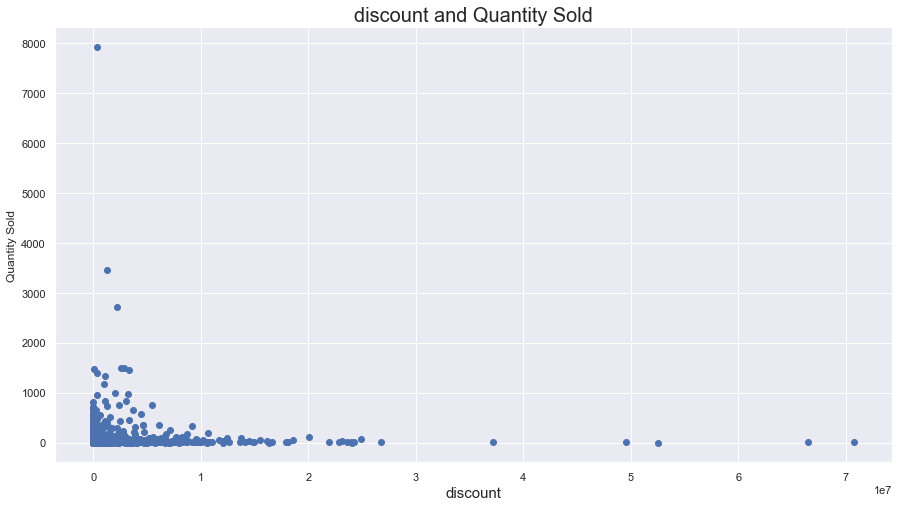

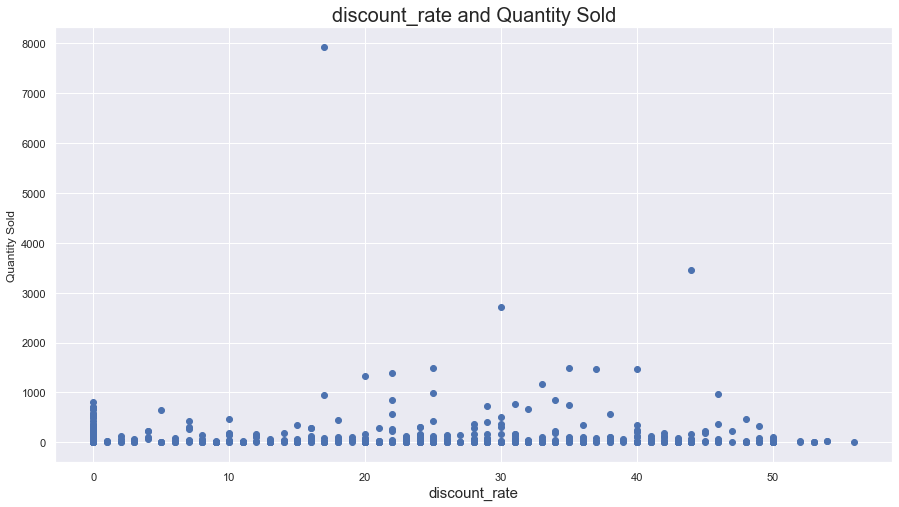

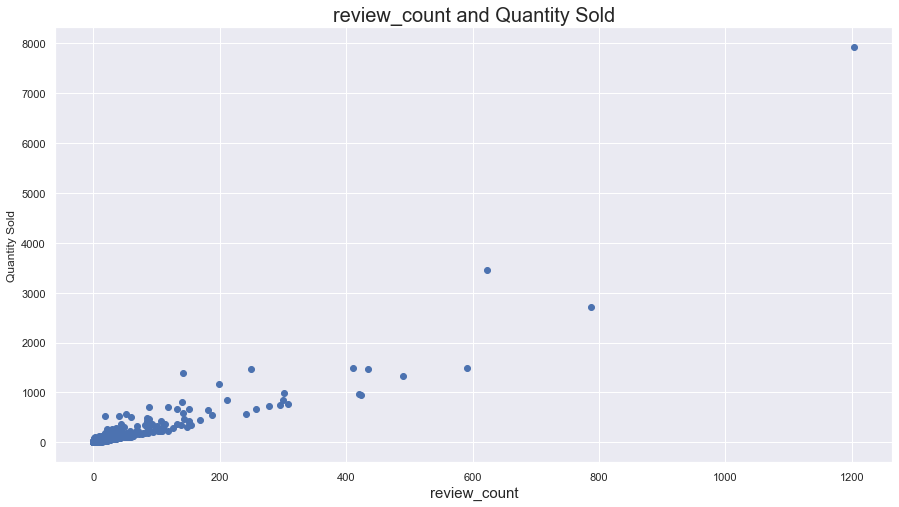

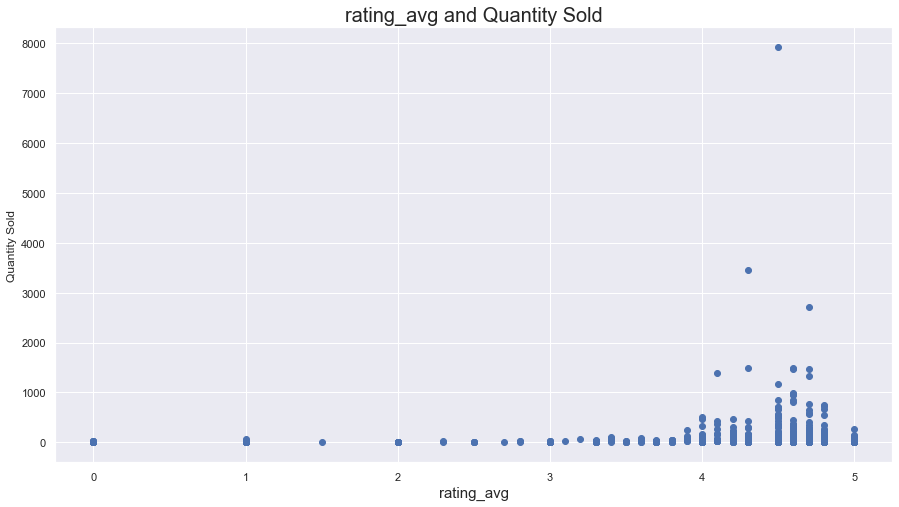

In [52]:
for i in df2.columns:
	if df2[f'{i}'].dtype !='object':
		plt.figure(figsize=(15,8))    
		plt.scatter(df2[f'{i}'],df2['Quantity_sold'])
		plt.title(f'{i} and Quantity Sold',size= 20)
		plt.xlabel(f'{i}',size=15)
		plt.ylabel('Quantity Sold')
		plt.show();

1.Quantity sold tương quan cùng chiều mạnh với số lượng review. 
 mọi người mua nhiều nên số lượng phản hồi về sản phẩm cũng cao hơn với cấc sản phẩm còn lại <br>
2.Quantity sold tương quan cao với tỷ lệ giảm giá-> mọi người có xu hướng lựa chọn những sản phẩm giảm giá, vì vậy mà các chương trình siêu sale hàng tháng luôn được chờ đợi <br>
3. Quantity sold tương quan âm với price -> một số sản phẩm có giá cao có thể không được người tiêu dùng lựa chọn 
trong ngành hàng điện tử này

### 2.3 Distribute of all variable in dataset

In [103]:
#  funtion to plot histogram 
def distplot(feature,frame,color = 'r'):
	plt.figure(figsize=(15,8))
	plt.title("Distribution for {}".format(feature),size=15)
	ax = sns.distplot(frame[feature],color = color);


c:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

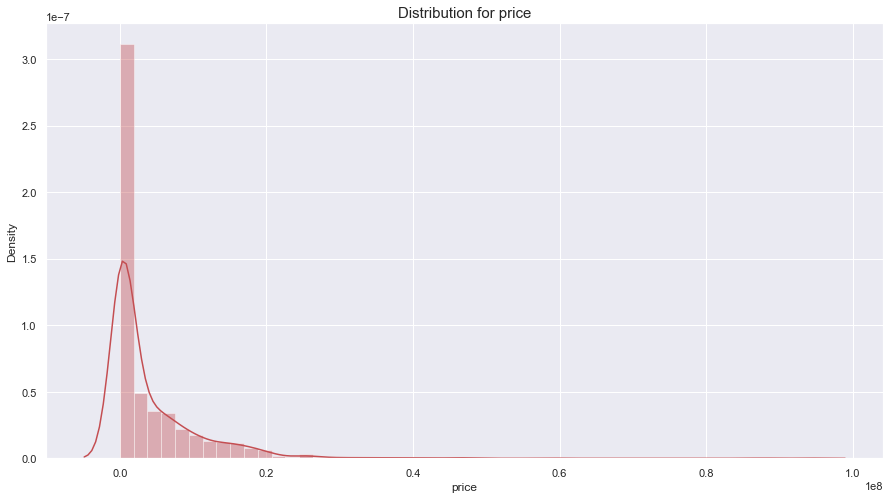

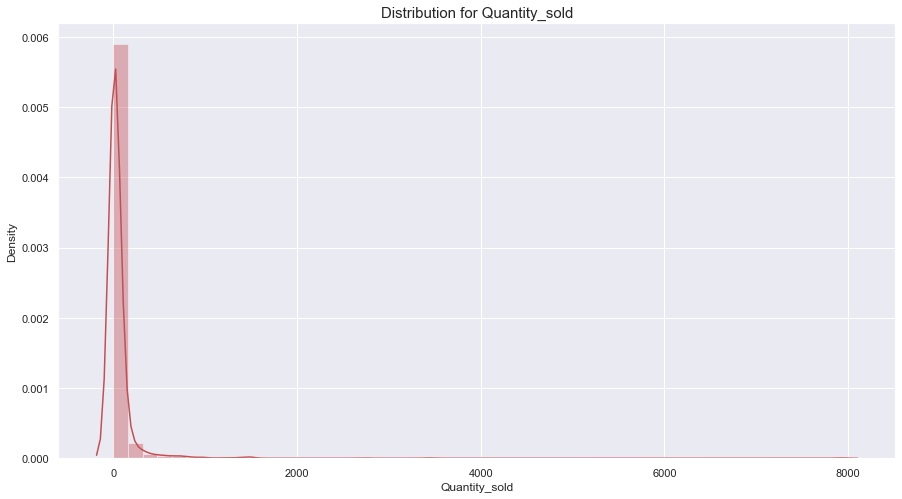

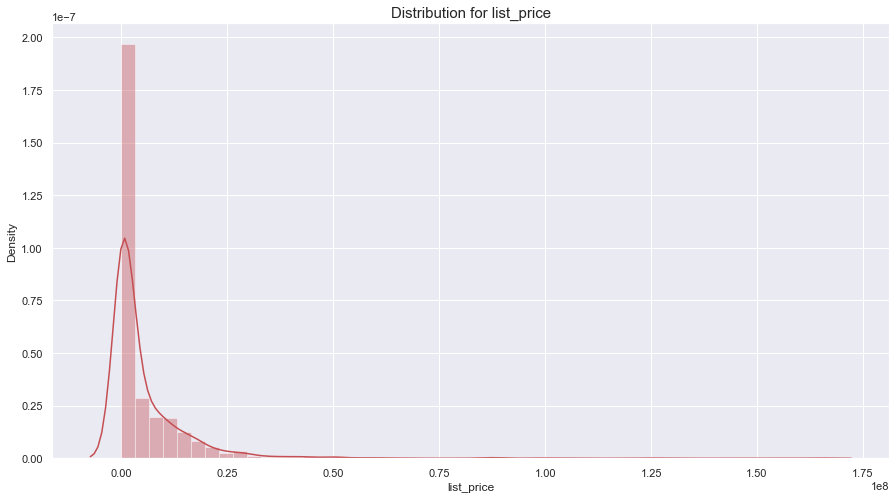

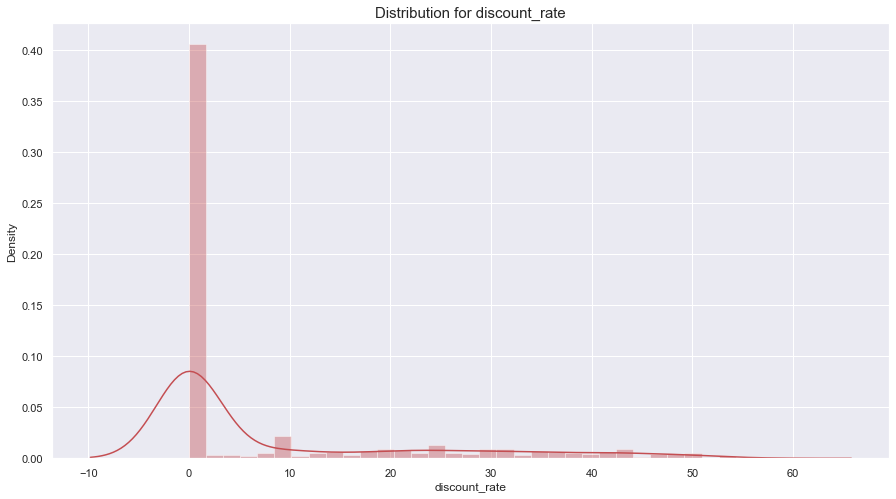

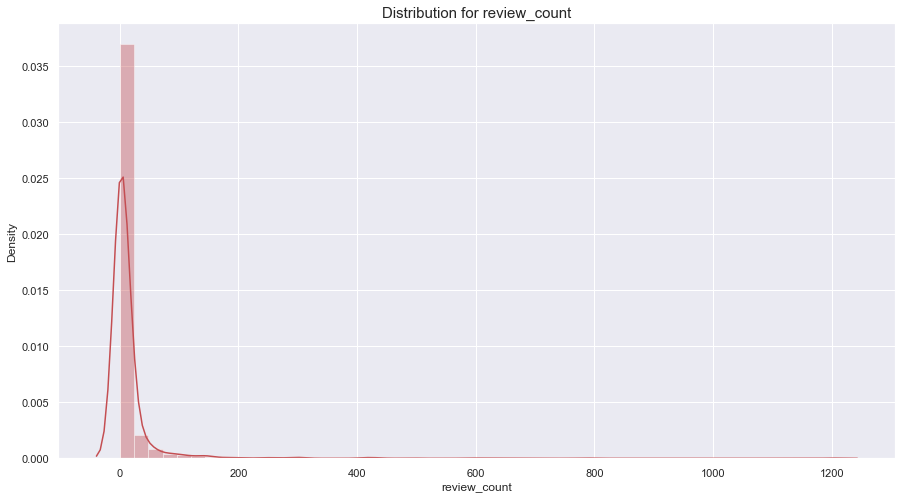

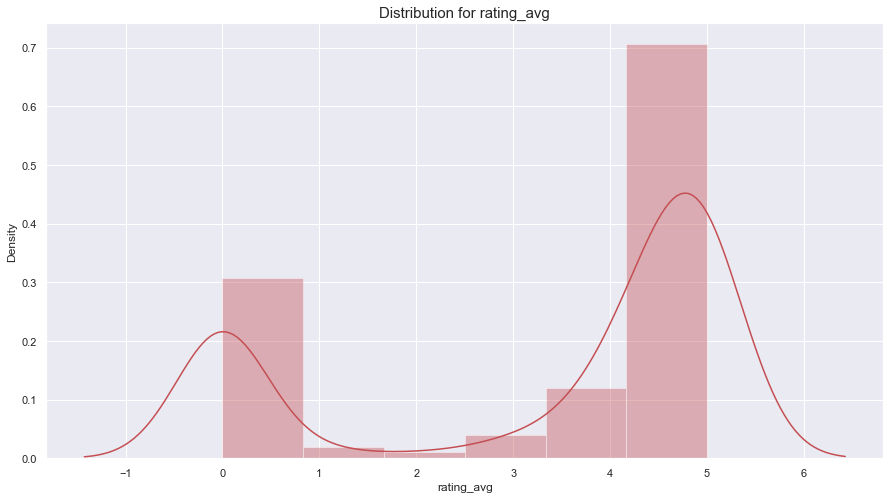

In [104]:
col = ['price','Quantity_sold','list_price','discount_rate','review_count','rating_avg']
for feature in col :
	distplot(feature,df2)

1. Trong ngành hàng điện tử giá chủ yếu phân bổ tập trung ở mức gia thấp là chính. <br>
2. Tỷ lệ discount chủ yếu dưới 10% <br>
3. Tỷ lệ raiting có sự phân bổ theo hai phía. Một mặt các sản phẩm được đánh giá rất cao, ngược lại được đánh giá rất thấp.Cho thấy chất lượng sản phẩm trên sàn không đồng đều <br>
nhiều sản phẩm rất tốt và còn nhiều sản phẩm chưa đạt chất lượng 

### 2.4 Distribute numberic variable of 5 brand have high quantity sold  

In [58]:
Top_5_brand = df2.groupby('brand_name').agg({'Quantity_sold':'sum'}).reset_index().sort_values(by='Quantity_sold',ascending = False).head(5)
Top_5_brand

,brand_name,Quantity_sold
118,OEM,18269.0
143,Samsung,13674.0
191,Xiaomi,8242.0
147,Sharp,6893.0
127,Panasonic,4974.0


In [59]:
brand_5 = []
for i in Top_5_brand['brand_name'].values:
	brand_5.append(i)
print(f"Top 5 brand with the most sales:{brand_5}")


Top 5 brand with the most sales:['OEM', 'Samsung', 'Xiaomi', 'Sharp', 'Panasonic']


In [60]:
# top 5 brand have hightly quantity
# a =  ['OEM','Samsung','Xiaomi','Sharp','Panasonic'] 
top5_brand_best_quan= df2[(df2['brand_name'].isin(brand_5))== True]
top5_brand_best_quan.head()


,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
1,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),5689000,1462.0,8990000,3301000,37,434,4.7,Samsung,>5tr
2,Máy Lạnh Sharp 1.5Hp Inverter AH,7549000,159.0,9990000,2441000,24,50,4.5,Sharp,>5tr
3,Android Tivi Xiaomi Full HD 43 inch A2 L43M7,5559900,41.0,6900000,1340100,19,12,4.7,Xiaomi,>5tr
4,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L),5440000,40.0,5440000,0,0,4,5.0,Samsung,>5tr
8,Loa Thanh Samsung 2.1ch 150W HW,1380000,953.0,1670000,290000,17,423,4.6,Samsung,"1tr - 1,5 tr"


### 2.4.1 Distribute price 

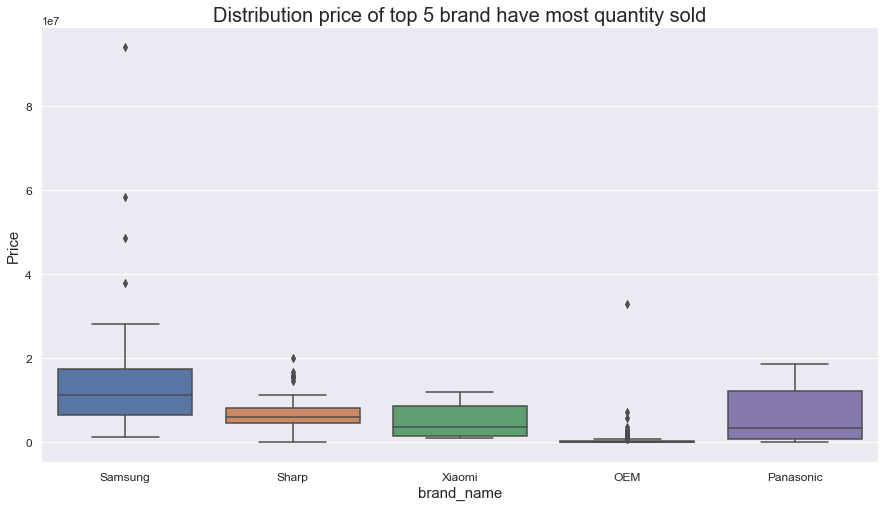

In [115]:
b= sns.boxplot(x='brand_name',y='price',data=top5_brand_best_quan)
b.axes.set_title("Distribution price of top 5 brand have most quantity sold",fontsize=20);
b.set_xlabel("brand_name",fontsize=15)
b.set_ylabel("Price",fontsize=15)
b.tick_params(labelsize=12)
plt.gcf().set_size_inches(15,8)


### 2.4.2 Distribute of discount rate

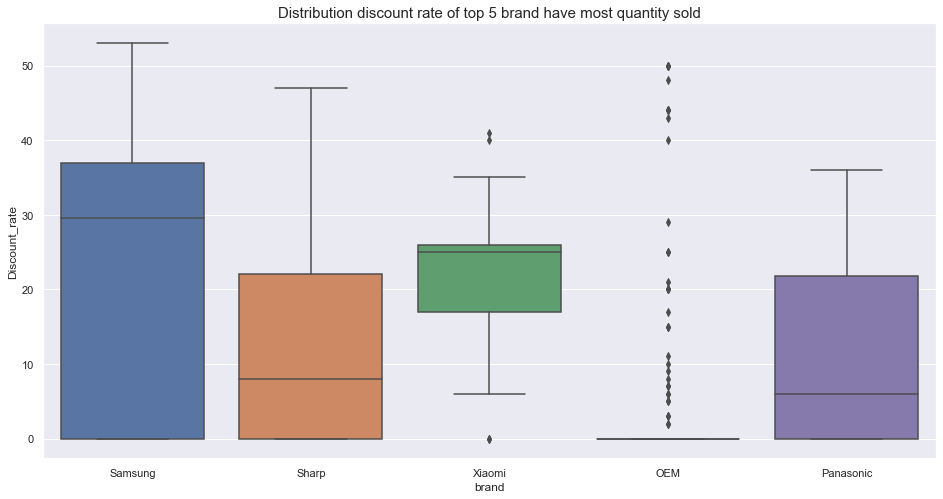

In [116]:
b= sns.boxplot(x='brand_name',y='discount_rate',data=top5_brand_best_quan)
b.axes.set_title("Distribution discount rate of top 5 brand have most quantity sold",fontsize= 15)
b.set_xlabel('brand')
b.set_ylabel('Discount_rate')
plt.gcf().set_size_inches(16,8)

1. Thương hiệu OEM rất ít giảm giá nhưng vẫn nằm trong top các sản phẩm có số lượng bán nhiều nhất trong điện máy -> có thể vì giá sản phẩm này rẻ <br> 
nên người mua không quá bận tâm đến sản phẩm có giảm giá hay không.
2. So với các thương hiệu bán chạy còn lại thì Samsung có tỷ lệ giảm giá nhiều hơn phần còn lại,gần 75% số lượng giảm giá với tỷ lệ gần 40%. Cũng dễ nhận biết vì các sản phẩm cảu Samsung có giá cao, nên đôi khi họ sẽ dùng các thủ thuật về giảm giá để kích thích mua hàng của người tiêu dùng

### 2.4.3 Distribute of review count

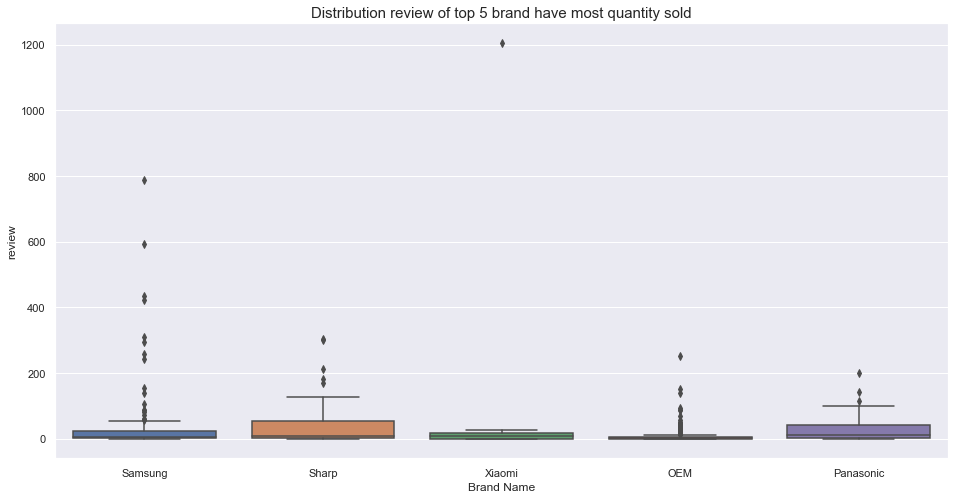

In [117]:
b = sns.boxplot(x='brand_name',y='review_count',data=top5_brand_best_quan)
b.axes.set_title("Distribution review of top 5 brand have most quantity sold",fontsize = 15)
b.set_xlabel('Brand Name')
b.set_ylabel("review")
plt.gcf().set_size_inches(16,8)

1. Nhìn chung các sản phẩm trong 5 thương hiệu có số lượng review trên mỗi sản phẩm 50 lượt/sản phẩm <br>
2. Samsung là thương hiệu có một số sản phẩm có số lượng review rất cao trải dài từ 150-> 800. Cái này có thể đến từ chất lượng của samsung đem lại sự hài lòng vượt trội cho khách hàng so với các thương hiệu còn lại
3. Xiaomi cũng có sản phẩm có số lượng review cao(gần 1200review) nhưng không trải rộng như Samsung. Có thể một vài sản phẩm của Xiaomi có chất lượng rất tốt vượt trội so với mặt bằng chung cảu thương hiệu.

### 2.4.4 Distribute AVG Rate 

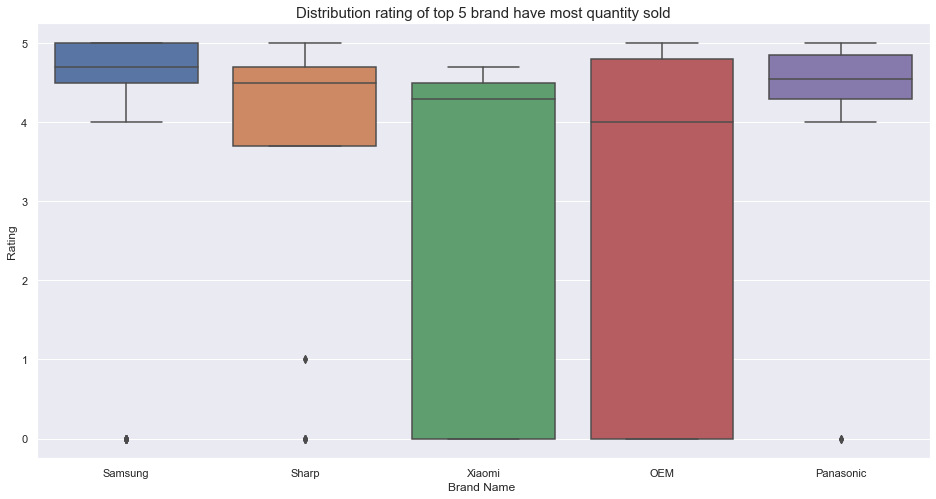

In [118]:
b= sns.boxplot(x='brand_name',y='rating_avg',data = top5_brand_best_quan)
b.axes.set_title('Distribution rating of top 5 brand have most quantity sold',fontsize=15)
b.set_xlabel('Brand Name ')
b.set_ylabel('Rating')
plt.gcf().set_size_inches(16,8)

1. SamSung là thương hiệu có tỷ lệ rating cao nhất so với các thương hiệu còn lại, 
 với gần 75% số lượng có tỷ lệ rating từ 4.5 sao trở lên.Đây là thương hiệu uy tín nên chất lượng đem đến 
 cho người dùng luôn tốt nhất, được đánh giá tốt hơn so với phần còn lại.
2. Sharp và Panasonic là hai thương hiệu có tỷ lệ rating cũng có sự tương đồng nhau.
 với khoảng 5O% số lượng raiting được đánh giá từ 4.5 sao trở lên .Cho  thấy 2 thương hiệu này cũng đem đến sự hài lòng từ sản phẩm rất cao.
3. Hai thương hiệu còn lại là Xiaomi và OEM có tỷ lệ rating trải dài từ thấp nhất 0 sao đến cao nhất 5 sao. 
 -> cho thấy chất lượng sản phẩm của hai thương hiệu này chưa đồng đều, có sản phẩm chất lượng tốt và một số sản phẩm  chất lượng chưa đem đến sự hài lòng cho người tiêu dùng. Có thể vì đây là thương hiệu đến từ China


In [68]:
top5_brand_best_quan[(top5_brand_best_quan['brand_name'] =='Xiaomi')&(top5_brand_best_quan['rating_avg']==0)]

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
418,Máy nước nóng để bàn Xiaomi Mijia C1 2.5L S2201,1110000,3.0,1490000,380000,26,0,0.0,Xiaomi,"1tr - 1,5 tr"
453,Smart Tivi Xiaomi A2 58 inch L58M7,8690000,1.0,8690000,0,0,0,0.0,Xiaomi,>5tr
533,Smart Mi TV P1 XIAOMI | 55'' | 4K UHD | ANDROID,8830000,1.0,11990000,3160000,26,0,0.0,Xiaomi,>5tr
672,Android Tivi Box Xiaomi Mibox S 4K Ultra HD PF...,1499000,1.0,1599000,100000,6,0,0.0,Xiaomi,"1tr - 1,5 tr"
1068,Smart Mi TV A2 XIAOMI | 32'' | ANDROID,3530000,2.0,5990000,2460000,41,0,0.0,Xiaomi,"3,5tr - 4 tr"
1072,"Tủ Lạnh Mini XIAOMI Baseus, Dung Tích 8L, 2 Ch...",1799000,1.0,2999000,1200000,40,0,0.0,Xiaomi,"1,5tr - 2 tr"


In [69]:
top5_brand_best_quan[(top5_brand_best_quan['brand_name'] =='Samsung')&(top5_brand_best_quan['rating_avg']==0)]

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
9,Tủ lạnh Samsung Inverter 208 lít RT19M300BGS/SV,4830000,2.0,4830000,0,0,0,0.0,Samsung,"4,5tr - 5 tr"
280,Smart Tivi Samsung 4K 65 inch UA65AU7002,14369900,3.0,18900000,4530100,24,0,0.0,Samsung,>5tr
338,Tủ Lạnh Side By Side Inverter Samsung RS62R500...,15789000,5.0,15789000,0,0,0,0.0,Samsung,>5tr
420,Smart Tivi QLED The Frame Samsung 4K 50 inch Q...,18019900,2.0,28900000,10880100,38,0,0.0,Samsung,>5tr
555,Tủ lạnh Samsung Inverter 488 lít RF48A4000B4/SV,15759000,1.0,15759000,0,0,0,0.0,Samsung,>5tr
736,Smart Tivi QLED Samsung 4K 65 inch QA65Q70BA,20859900,2.0,30900000,10040100,32,0,0.0,Samsung,>5tr
907,Smart Tivi Neo QLED Samsung 4K 65 inch QA65QN85BA,28149900,6.0,54900000,26750100,49,0,0.0,Samsung,>5tr
964,Tủ Lạnh Side By Side Inverter Samsung RS62R500...,15969000,2.0,15969000,0,0,0,0.0,Samsung,>5tr
1077,Smart Tivi QLED The Frame Samsung 4K 65 inch Q...,26019900,4.0,40900000,14880100,36,0,0.0,Samsung,>5tr
1149,Smart Tivi Crystal Samsung 4K 75 inch UA75BU8000,25309900,1.0,35900000,10590100,29,0,0.0,Samsung,>5tr


In [70]:
top5_brand_best_quan[(top5_brand_best_quan['brand_name'] =='Sharp')&(top5_brand_best_quan['rating_avg']==0)]

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
40,Tủ lạnh Sharp Inverter 150 lít SJ,4440000,1.0,4440000,0,0,0,0.0,Sharp,"4tr - 4,5tr"
322,HÀNG CHÍNH HÃNG,7450000,8.0,7450000,0,0,0,0.0,Sharp,>5tr
716,Máy giặt Sharp Inverter 10.5 Kg ES,6149000,2.0,6149000,0,0,0,0.0,Sharp,>5tr
1306,Máy lạnh Sharp Inverter 2 HP AH,11190000,3.0,11190000,0,0,0,0.0,Sharp,>5tr
1463,Máy Giặt Sharp Inverter 8.5 Kg ES,4150000,2.0,4150000,0,0,0,0.0,Sharp,"4tr - 4,5tr"
1498,Máy giặt SHARP ES,4790000,1.0,4790000,0,0,0,0.0,Sharp,"4,5tr - 5 tr"
1575,Androi Tivi full HD Sharp 2T,4497000,1.0,8420000,3923000,47,0,0.0,Sharp,"4tr - 4,5tr"
1743,Tủ Lạnh Inverter Sharp SJ,6650000,1.0,6650000,0,0,0,0.0,Sharp,>5tr
1836,Tủ lạnh Sharp Inverter 342 lít SJ,7040000,1.0,7040000,0,0,0,0.0,Sharp,>5tr


In [71]:
top5_brand_best_quan[(top5_brand_best_quan['brand_name'] =='Panasonic')&(top5_brand_best_quan['rating_avg']==0)]

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
571,Máy giặt sấy Panasonic Inverter 10 kg NA,14490000,1.0,14490000,0,0,0,0.0,Panasonic,>5tr
599,Tủ lạnh Panasonic 2 cánh ngăn đá trên NR,14990000,1.0,17190000,2200000,13,0,0.0,Panasonic,>5tr
1943,Tủ Lạnh 2 Cánh Panasonic 322 Lít NR,14690000,1.0,16890000,2200000,13,0,0.0,Panasonic,>5tr


In [72]:
# 1.Những sản phẩm của các thương hiệu có rating bằng 0 là các SP có số 
# lượng mua ít chỉ vài sản phẩm nên gần như không ai để lại đánh giá và cũng có thể đây là sản phẩm mới bán 
# trên sàn

In [73]:
gr_quanti_brand = df2.groupby('brand_name').agg({'Quantity_sold':'sum','price':'mean','discount_rate':'mean','review_count':'sum','rating_avg':'mean'}).reset_index().sort_values(by='Quantity_sold',ascending=False).head(10)
gr_quanti_brand

,brand_name,Quantity_sold,price,discount_rate,review_count,rating_avg
118,OEM,18269.0,3.733602e+05,1.270758,3379,2.963899
143,Samsung,13674.0,1.397340e+07,23.432692,4879,3.916346
191,Xiaomi,8242.0,4.991346e+06,22.000000,1307,2.446154
147,Sharp,6893.0,7.510742e+06,11.800000,2123,3.497778
127,Panasonic,4974.0,6.122596e+06,10.916667,1171,4.205556
13,Ariston,4269.0,2.833821e+06,15.750000,913,3.485714
95,LG,3374.0,1.072344e+07,21.148649,1306,3.744595
11,Aqua,3081.0,5.499786e+06,13.142857,1107,3.378571
57,Ferroli,2715.0,2.222838e+06,13.142857,300,3.435714
52,Electrolux,2414.0,8.072429e+06,8.452381,697,3.154762


### 3.visualization 

In [74]:
A = df2['brand_name'].nunique()
print(f'Sum of Brand:{A}')

Sum of Brand:203


In [75]:
B = df2['Tên SP'].nunique()
print(f'Sum of product:{B}')

Sum of product:1468


#### 1.Plot brand name with other variable

In [76]:
gr_quanti_brand

,brand_name,Quantity_sold,price,discount_rate,review_count,rating_avg
118,OEM,18269.0,3.733602e+05,1.270758,3379,2.963899
143,Samsung,13674.0,1.397340e+07,23.432692,4879,3.916346
191,Xiaomi,8242.0,4.991346e+06,22.000000,1307,2.446154
147,Sharp,6893.0,7.510742e+06,11.800000,2123,3.497778
127,Panasonic,4974.0,6.122596e+06,10.916667,1171,4.205556
13,Ariston,4269.0,2.833821e+06,15.750000,913,3.485714
95,LG,3374.0,1.072344e+07,21.148649,1306,3.744595
11,Aqua,3081.0,5.499786e+06,13.142857,1107,3.378571
57,Ferroli,2715.0,2.222838e+06,13.142857,300,3.435714
52,Electrolux,2414.0,8.072429e+06,8.452381,697,3.154762


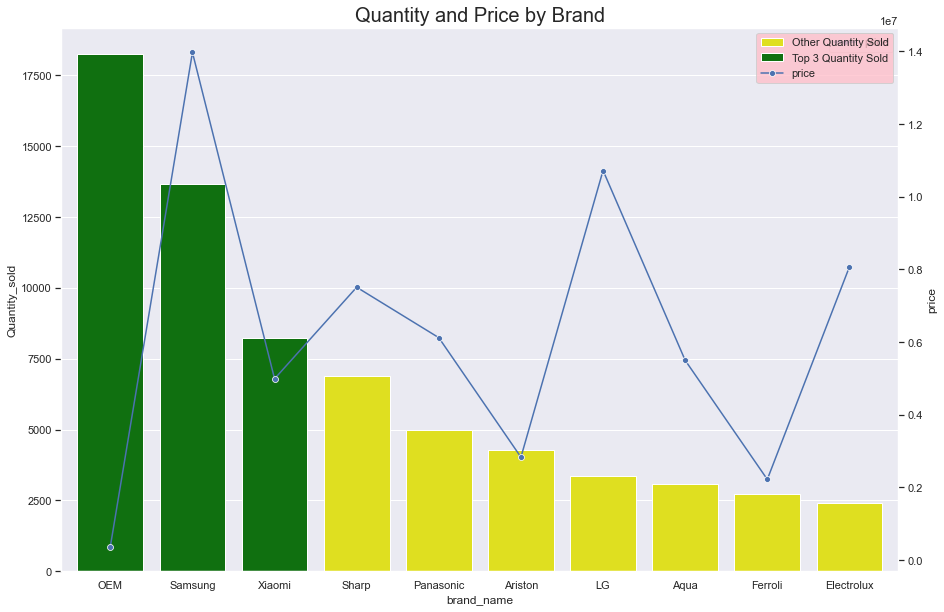

In [77]:
top3_brand = gr_quanti_brand.iloc[0:3,1].to_list()
colors = ['yellow' if bar in top3_brand else 'green' for bar in gr_quanti_brand['Quantity_sold']]
colors_ = ['green' if bar in top3_brand else 'yellow' for bar in gr_quanti_brand['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='brand_name',y='Quantity_sold',data=gr_quanti_brand,palette =colors,ax= ax,label='Other Quantity Sold')
g=sns.barplot(x='brand_name',y='Quantity_sold',data=gr_quanti_brand,ax= ax,palette= colors_,label='Top 3 Quantity Sold')

g=sns.lineplot(x='brand_name',y='price',data=gr_quanti_brand,marker='o', ax=ax2 ,label="price" )
ax.set_title("Quantity and Price by Brand",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()



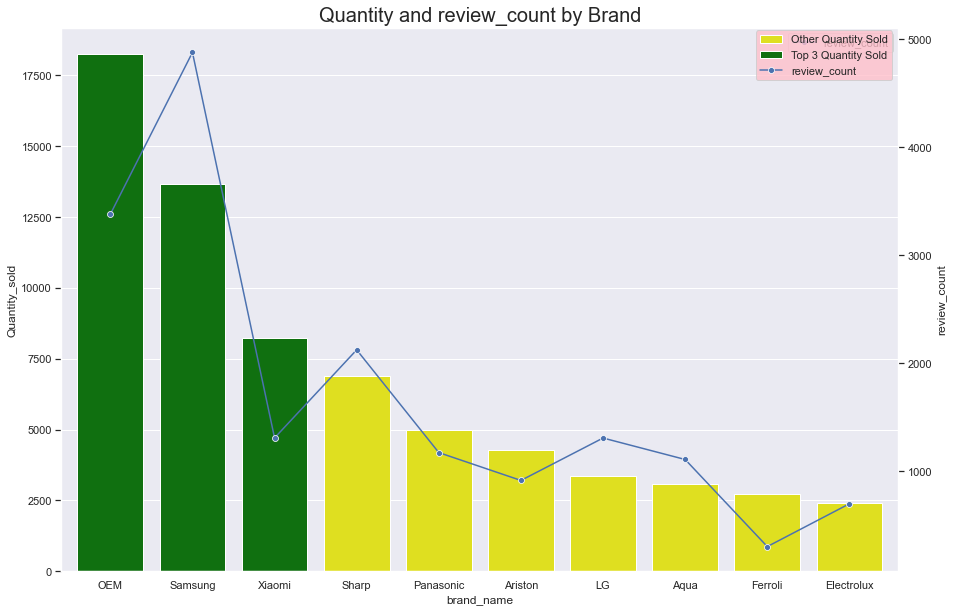

In [79]:
top3_brand = gr_quanti_brand.iloc[0:3,1].to_list()
colors = ['yellow' if bar in top3_brand else 'green' for bar in gr_quanti_brand['Quantity_sold']]
colors_ = ['green' if bar in top3_brand else 'yellow' for bar in gr_quanti_brand['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='brand_name',y='Quantity_sold',data=gr_quanti_brand,palette =colors,ax= ax,label='Other Quantity Sold')
g=sns.barplot(x='brand_name',y='Quantity_sold',data=gr_quanti_brand,ax= ax,palette= colors_,label='Top 3 Quantity Sold')

g=sns.lineplot(x='brand_name',y='review_count',data=gr_quanti_brand,marker='o', ax=ax2 ,label="review_count" )
ax.set_title("Quantity and review_count by Brand",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(0.999,1.005), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

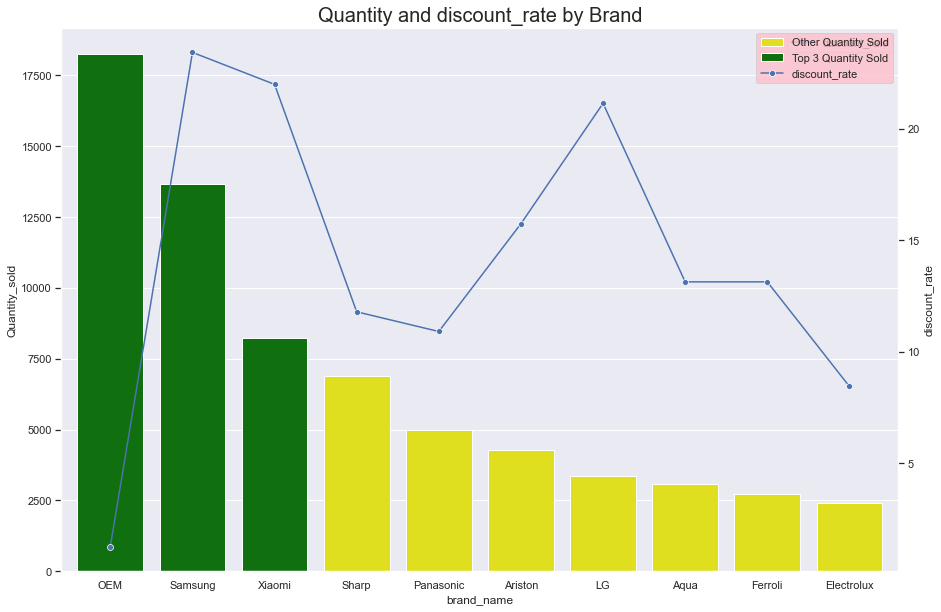

In [80]:
top3_brand = gr_quanti_brand.iloc[0:3,1].to_list()
colors = ['yellow' if bar in top3_brand else 'green' for bar in gr_quanti_brand['Quantity_sold']]
colors_ = ['green' if bar in top3_brand else 'yellow' for bar in gr_quanti_brand['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='brand_name',y='Quantity_sold',data=gr_quanti_brand,palette =colors,ax= ax,label='Other Quantity Sold')
g=sns.barplot(x='brand_name',y='Quantity_sold',data=gr_quanti_brand,ax= ax,palette= colors_,label='Top 3 Quantity Sold')

g=sns.lineplot(x='brand_name',y='discount_rate',data=gr_quanti_brand,marker='o', ax=ax2 ,label="discount_rate" )
ax.set_title("Quantity and discount_rate by Brand",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

#### 2.plot product name with other variable

In [81]:
gr_quanti_name = df2.groupby('Tên SP').agg({'Quantity_sold':'sum','price':'mean','discount_rate':'mean','review_count':'sum','rating_avg':'mean'}).reset_index().sort_values(by='Quantity_sold',ascending=False).head(15)
gr_quanti_name

,Tên SP,Quantity_sold,price,discount_rate,review_count,rating_avg
61,Android Tivi Box Xiaomi Mibox S 4K Global Quốc Tế,7917.0,1520000.0,17.000000,1204,4.500000
638,Máy Nước Nóng Ariston SB35E,3449.0,1590000.0,44.000000,623,4.300000
657,Máy Nước Nóng Panasonic DH,3285.0,3046250.0,27.875000,674,4.362500
1204,Tủ lạnh Samsung Inverter 208 lít RT19M300BGS/SV,2713.0,4879500.0,15.000000,787,2.350000
749,Máy lạnh Sharp Inverter 1 HP AH,1842.0,5920000.0,23.333333,606,4.400000
706,Máy giặt Samsung Inverter 8 kg WW80T3020WW,1499.0,5189500.0,17.500000,592,4.800000
665,Máy Rửa Bát Electrolux ESF6010BW,1496.0,7450000.0,25.000000,411,4.300000
1106,"Túi vệ sinh máy lạnh TD01, Áo vệ sinh máy lạnh...",1466.0,99000.0,40.000000,250,4.600000
744,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),1462.0,5689000.0,37.000000,434,4.700000
652,Máy Nước Nóng Ferroli Rita FS,1389.0,1290000.0,22.000000,142,4.100000


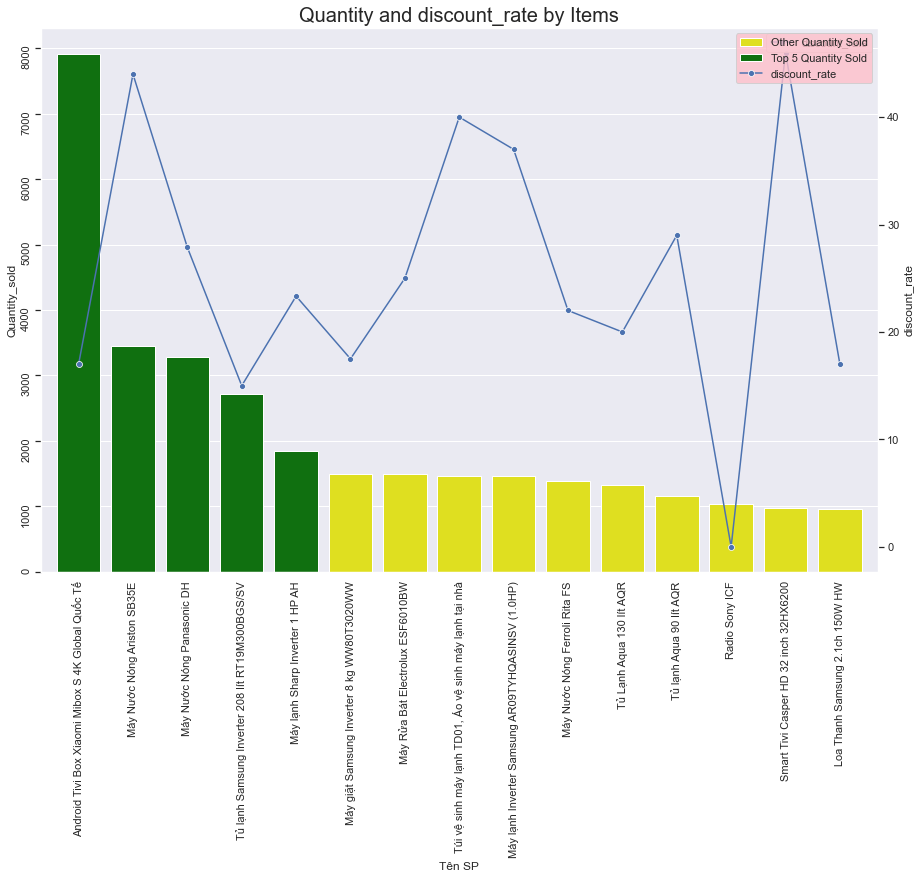

In [82]:
top3_brand = gr_quanti_name.iloc[0:5,1].to_list()
colors = ['yellow' if bar in top3_brand else 'green' for bar in gr_quanti_name['Quantity_sold']]
colors_ = ['green' if bar in top3_brand else 'yellow' for bar in gr_quanti_name['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,palette =colors,ax= ax,label='Other Quantity Sold')
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,ax= ax,palette= colors_,label='Top 5 Quantity Sold')
ax.tick_params(rotation=90)

g=sns.lineplot(x='Tên SP',y='discount_rate',data=gr_quanti_name,marker='o', ax=ax2 ,label="discount_rate" )
ax.set_title("Quantity and discount_rate by Items",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

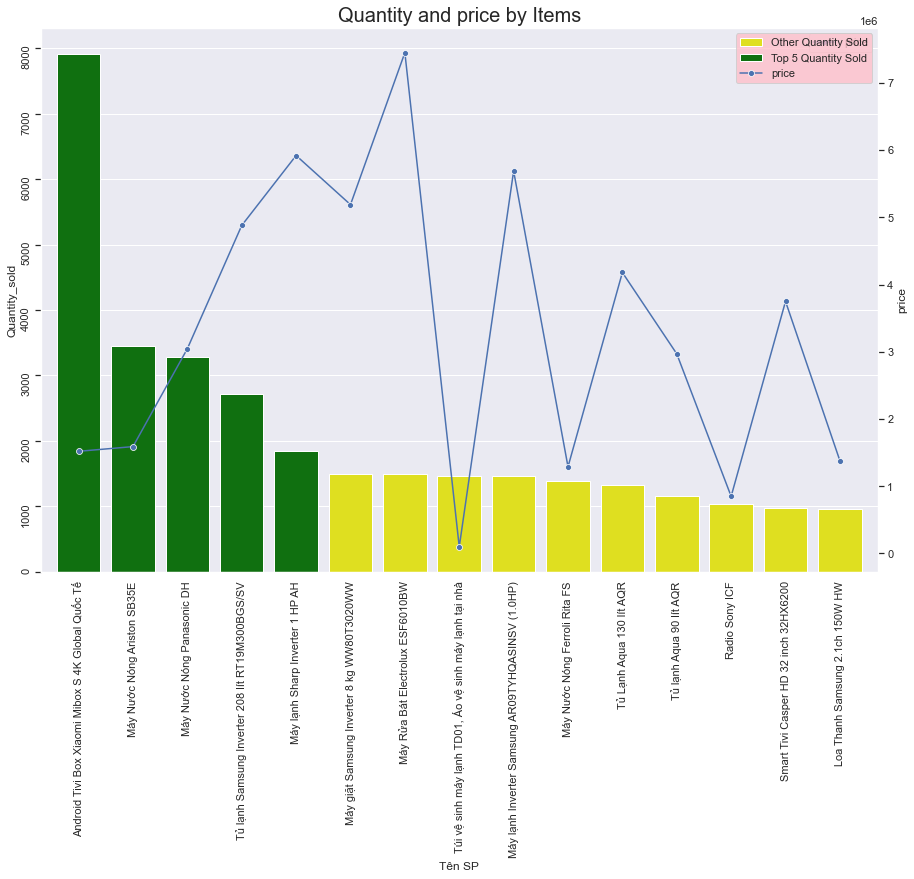

In [83]:
top3_brand = gr_quanti_name.iloc[0:5,1].to_list()
colors = ['yellow' if bar in top3_brand else 'green' for bar in gr_quanti_name['Quantity_sold']]
colors_ = ['green' if bar in top3_brand else 'yellow' for bar in gr_quanti_name['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,palette =colors,ax= ax,label='Other Quantity Sold')
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,ax= ax,palette= colors_,label='Top 5 Quantity Sold')
ax.tick_params(rotation=90)

g=sns.lineplot(x='Tên SP',y='price',data=gr_quanti_name,marker='o', ax=ax2 ,label="price" )
ax.set_title("Quantity and price by Items",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

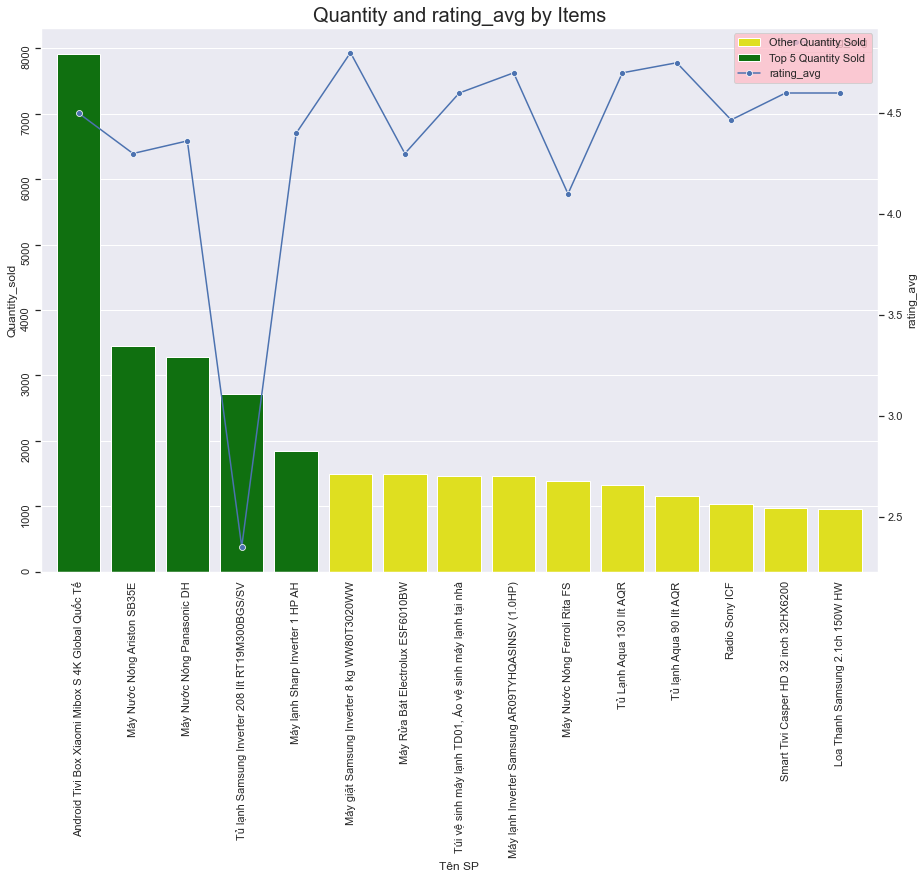

In [84]:
top3_brand = gr_quanti_name.iloc[0:5,1].to_list()
colors = ['yellow' if bar in top3_brand else 'green' for bar in gr_quanti_name['Quantity_sold']]
colors_ = ['green' if bar in top3_brand else 'yellow' for bar in gr_quanti_name['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,palette =colors,ax= ax,label='Other Quantity Sold')
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,ax= ax,palette= colors_,label='Top 5 Quantity Sold ')
ax.tick_params(rotation=90)

g=sns.lineplot(x='Tên SP',y='rating_avg',data=gr_quanti_name,marker='o', ax=ax2 ,label="rating_avg" )
ax.set_title("Quantity and rating_avg by Items",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

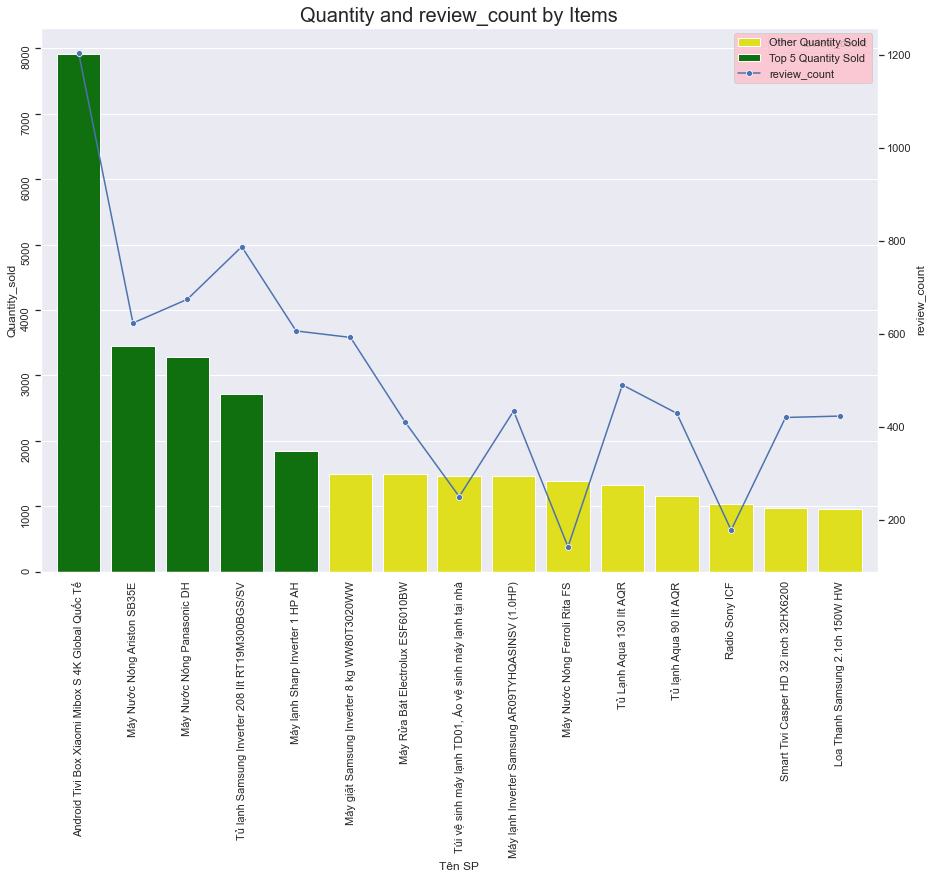

In [85]:
top3_brand = gr_quanti_name.iloc[0:5,1].to_list()
colors = ['yellow' if bar in top3_brand else 'green' for bar in gr_quanti_name['Quantity_sold']]
colors_ = ['green' if bar in top3_brand else 'yellow' for bar in gr_quanti_name['Quantity_sold']]

fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,palette =colors,ax= ax,label='Other Quantity Sold')
g=sns.barplot(x='Tên SP',y='Quantity_sold',data=gr_quanti_name,ax= ax,palette= colors_,label='Top 5 Quantity Sold ')
ax.tick_params(rotation=90)

g=sns.lineplot(x='Tên SP',y='review_count',data=gr_quanti_name,marker='o', ax=ax2 ,label="review_count" )
ax.set_title("Quantity and review_count by Items",fontsize=20)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes,facecolor="pink")
ax2.grid(False)
ax.set_ylim(ymin=0) # let bars touch the bottom of the plot
ax.margins(x=0.02)
plt.show()

## Apply machine learning

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [88]:
df2.reset_index().head()

,index,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
0,1,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),5689000,1462.0,8990000,3301000,37,434,4.7,Samsung,>5tr
1,2,Máy Lạnh Sharp 1.5Hp Inverter AH,7549000,159.0,9990000,2441000,24,50,4.5,Sharp,>5tr
2,3,Android Tivi Xiaomi Full HD 43 inch A2 L43M7,5559900,41.0,6900000,1340100,19,12,4.7,Xiaomi,>5tr
3,4,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L),5440000,40.0,5440000,0,0,4,5.0,Samsung,>5tr
4,5,Máy Rửa Bát Electrolux ESF6010BW,7450000,1496.0,9990000,2540000,25,411,4.3,Electrolux,>5tr


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 1 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tên SP         1547 non-null   object 
 1   price          1547 non-null   int64  
 2   Quantity_sold  1547 non-null   float64
 3   list_price     1547 non-null   int64  
 4   discount       1547 non-null   int64  
 5   discount_rate  1547 non-null   int64  
 6   review_count   1547 non-null   int64  
 7   rating_avg     1547 non-null   float64
 8   brand_name     1547 non-null   object 
 9   range_price_   1547 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 132.9+ KB


In [90]:
col_model = ['price','Quantity_sold','discount_rate','review_count','rating_avg']
df_model = df2[col_model]

In [91]:
sc = StandardScaler()
ms = MinMaxScaler()
df_km = ms.fit_transform(df_model)
df_km


array([[6.04570249e-02, 1.84562911e-01, 6.60714286e-01, 3.60465116e-01,
        9.40000000e-01],
       [8.02232521e-02, 1.99595755e-02, 4.28571429e-01, 4.15282392e-02,
        9.00000000e-01],
       [5.90850787e-02, 5.05305710e-03, 3.39285714e-01, 9.96677741e-03,
        9.40000000e-01],
       ...,
       [1.53985286e-01, 2.52652855e-04, 0.00000000e+00, 8.30564784e-04,
        1.00000000e+00],
       [3.92136442e-02, 2.52652855e-04, 0.00000000e+00, 8.30564784e-04,
        1.00000000e+00],
       [5.17534025e-01, 2.52652855e-04, 7.67857143e-01, 8.30564784e-04,
        1.00000000e+00]])

In [92]:
%%time
df_kmean = pd.DataFrame(df_km,columns=['price','Quantity_sold','discount_rate','review_count','rating_avg'])
df_kmean.head()

Wall time: 0 ns


,price,Quantity_sold,discount_rate,review_count,rating_avg
0,0.060457,0.184563,0.660714,0.360465,0.94
1,0.080223,0.019960,0.428571,0.041528,0.90
2,0.059085,0.005053,0.339286,0.009967,0.94
3,0.057811,0.004927,0.000000,0.003322,1.00
4,0.079171,0.188858,0.446429,0.341362,0.86


In [93]:
%%time
df_kmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1547 non-null   float64
 1   Quantity_sold  1547 non-null   float64
 2   discount_rate  1547 non-null   float64
 3   review_count   1547 non-null   float64
 4   rating_avg     1547 non-null   float64
dtypes: float64(5)
memory usage: 60.6 KB
Wall time: 19 ms


In [94]:
from sklearn.cluster import KMeans
plt.figure(figsize=(20,8))
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_kmean)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs,'-bo')
plt.title('The Elbow Method',size=20)
plt.xlabel('Number of clusters',size = 15)
plt.xlabel('k')
plt.ylabel('CS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

<Figure size 1440x576 with 0 Axes>

chọn K= 3

In [ ]:
km3= KMeans(n_clusters=3)
km3 = km3.fit(df_kmean)

In [ ]:
print(km3.labels_)

[2 2 2 ... 0 0 2]


In [ ]:
df2 = df2.reset_index()
df2.drop(columns='index',inplace=True)

In [ ]:
df2.head()

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_
0,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),5689000,1462.0,8990000,3301000,37,434,4.7,Samsung,>5tr
1,Máy Lạnh Sharp 1.5Hp Inverter AH,7549000,159.0,9990000,2441000,24,50,4.5,Sharp,>5tr
2,Android Tivi Xiaomi Full HD 43 inch A2 L43M7,5559900,41.0,6900000,1340100,19,12,4.7,Xiaomi,>5tr
3,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L),5440000,40.0,5440000,0,0,4,5.0,Samsung,>5tr
4,Máy Rửa Bát Electrolux ESF6010BW,7450000,1496.0,9990000,2540000,25,411,4.3,Electrolux,>5tr


In [ ]:
labels = km3.labels_
labels= pd.DataFrame(labels,columns=['cluster'])
df_cluster = pd.concat([df2,labels],axis=1)
df_cluster.head()

,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name,range_price_,cluster
0,Máy lạnh Inverter Samsung AR09TYHQASINSV (1.0HP),5689000,1462.0,8990000,3301000,37,434,4.7,Samsung,>5tr,2
1,Máy Lạnh Sharp 1.5Hp Inverter AH,7549000,159.0,9990000,2441000,24,50,4.5,Sharp,>5tr,2
2,Android Tivi Xiaomi Full HD 43 inch A2 L43M7,5559900,41.0,6900000,1340100,19,12,4.7,Xiaomi,>5tr,2
3,Tủ Lạnh Inverter Samsung RT20HAR8DBU/SV (208L),5440000,40.0,5440000,0,0,4,5.0,Samsung,>5tr,0
4,Máy Rửa Bát Electrolux ESF6010BW,7450000,1496.0,9990000,2540000,25,411,4.3,Electrolux,>5tr,2


In [ ]:
df_cluster.cluster.unique()

array([2, 0, 1])

### Phần trăm cụm

In [ ]:
round(df_cluster.groupby('cluster').size()/df_cluster.shape[0]*100,2)

cluster
0    53.52
1    27.86
2    18.62
dtype: float64

In [ ]:
df_cluster[['Quantity_sold','price','discount_rate','review_count','cluster']].groupby('cluster').describe().T


cluster                         0             1             2
Quantity_sold count  8.280000e+02  4.310000e+02  2.880000e+02
              mean   4.166908e+01  3.257541e+00  1.741389e+02
              std    9.019792e+01  4.919920e+00  5.831074e+02
              min    1.000000e+00  1.000000e+00  1.000000e+00
              25%    5.000000e+00  1.000000e+00  9.000000e+00
              50%    1.300000e+01  2.000000e+00  3.300000e+01
              75%    3.600000e+01  3.000000e+00  1.102500e+02
              max    8.130000e+02  7.000000e+01  7.917000e+03
price         count  8.280000e+02  4.310000e+02  2.880000e+02
              mean   2.309628e+06  4.197706e+06  9.153247e+06
              std    4.045126e+06  9.049419e+06  7.853515e+06
              min    2.900000e+03  0.000000e+00  6.900000e+04
              25%    9.500000e+04  1.041000e+05  3.881225e+06
              50%    4.404500e+05  6.850000e+05  7.405000e+06
              75%    2.512250e+06  4.498500e+06  1.235992e+07
              max    2.890000e+07  9.409990e+07  5.842990e+07
discount_rate count  8.280000e+02  4.310000e+02  2.880000e+02
              mean   1.428744e+00  4.174014e+00  3.295486e+01
              std    3.785161e+00  1.073269e+01  9.869605e+00
              min    0.000000e+00  0.000000e+00  1.700000e+01
              25%    0.000000e+00  0.000000e+00  2.400000e+01
              50%    0.000000e+00  0.000000e+00  3.200000e+01
              75%    0.000000e+00  0.000000e+00  4.100000e+01
              max    1.700000e+01  5.300000e+01  5.600000e+01
review_count  count  8.280000e+02  4.310000e+02  2.880000e+02
              mean   1.021377e+01  1.044084e-01  4.852083e+01
              std    2.140532e+01  3.806409e-01  1.208744e+02
              min    1.000000e+00  0.000000e+00  1.000000e+00
              25%    1.000000e+00  0.000000e+00  2.000000e+00
              50%    3.000000e+00  0.000000e+00  1.100000e+01
              75%    9.000000e+00  0.000000e+00  3.725000e+01
              max    1.870000e+02  3.000000e+00  1.204000e+03

#### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
col_model = ['price','Quantity_sold','discount_rate','review_count','rating_avg']
df_model = df2[col_model]

In [ ]:
sc = StandardScaler()
ms = MinMaxScaler()
df_DB = sc.fit_transform(df_model)
df_DB


array([[ 0.22464241,  5.28104592,  2.04174319,  7.37096485,  0.65972513],
       [ 0.48921345,  0.38816727,  1.12449579,  0.62330192,  0.56281175],
       [ 0.20627891, -0.05493302,  0.77170832, -0.04443556,  0.65972513],
       ...,
       [ 1.47651858, -0.19762633, -0.56888404, -0.23772799,  0.8050952 ],
       [-0.05970033, -0.19762633, -0.56888404, -0.23772799,  0.8050952 ],
       [ 6.34262001, -0.19762633,  2.46508815, -0.23772799,  0.8050952 ]])

In [ ]:
df_DB = pd.DataFrame(df_km,columns=['price','Quantity_sold','discount_rate','review_count','rating_avg'])
df_DB.head(10)

,price,Quantity_sold,discount_rate,review_count,rating_avg
0,0.060457,0.184563,0.660714,0.360465,0.94
1,0.080223,0.019960,0.428571,0.041528,0.90
2,0.059085,0.005053,0.339286,0.009967,0.94
3,0.057811,0.004927,0.000000,0.003322,1.00
4,0.079171,0.188858,0.446429,0.341362,0.86
5,0.164611,0.008464,0.625000,0.016611,1.00
6,0.005303,0.004800,0.125000,0.003322,1.00
7,0.014665,0.120263,0.303571,0.351329,0.92
8,0.051328,0.000126,0.000000,0.000000,0.00
9,0.077280,0.001895,0.553571,0.004983,1.00


In [ ]:
number_of_outliers = []
percentage_of_outliers = []
min_samples = 2*df_DB.shape[1]
for eps in np.linspace(0.001,3,50):
    dbscan = DBSCAN(eps=eps,min_samples=min_samples)
    dbscan.fit(df_DB)
    
    number_of_outliers.append(np.sum(dbscan.labels_ ==-1))
    
    perc_outliers = 100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
    percentage_of_outliers.append(perc_outliers)

<AxesSubplot:>

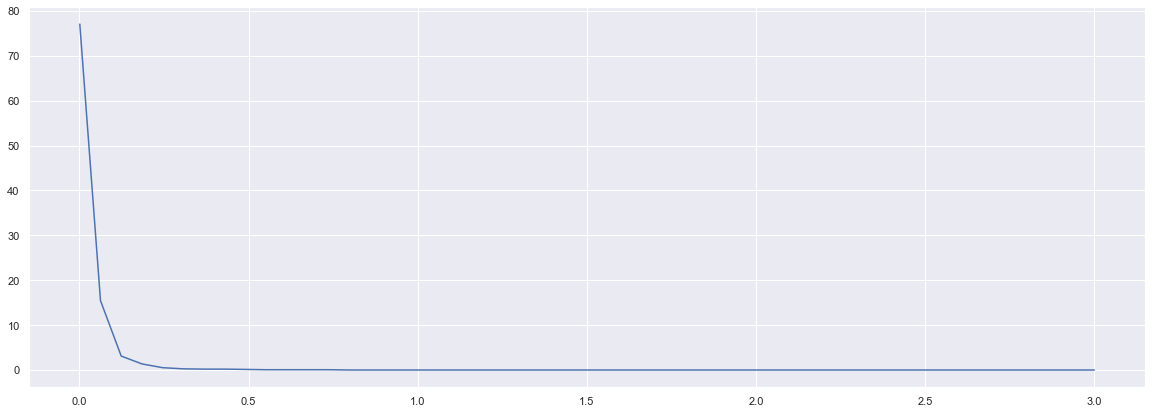

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=percentage_of_outliers)


In [ ]:
min_samples = 0.1*df_DB.shape[1]
dbscan = DBSCAN(eps=0.1,min_samples= min_samples)


In [ ]:
dbscan.fit(df_DB)

TypeError: min_samples must be an instance of int, not float.

In [ ]:
import numpy as np
np.version.version


'1.22.4'

In [ ]:
scikit-learn.version

NameError: name 'scikit' is not defined

In [ ]:
# import nltk
import sklearn

# print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.2.


In [ ]:
import requests
import pandas as pd

resp = requests.get('https://reqres.in/api/users')
resp_dict = resp.json()
df = pd.DataFrame(resp_dict.get('data'))
print(df.head(2))


   id                   email first_name last_name  \
0   1  george.bluth@reqres.in     George     Bluth   
1   2  janet.weaver@reqres.in      Janet    Weaver   

                                    avatar  
0  https://reqres.in/img/faces/1-image.jpg  
1  https://reqres.in/img/faces/2-image.jpg  


In [ ]:
!pip install tqdm

     ---------------------------------------- 78.5/78.5 kB 1.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import requests
import time
import random
from tqdm import tqdm
from datetime import datetime
import json

In [ ]:
cookie = {
    'TIKI_GUEST_TOKEN': '8jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY',
    'TOKENS': '{%22access_token%22:%228jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY%22%2C%22expires_in%22:157680000%2C%22expires_at%22:1763654224277%2C%22guest_token%22:%228jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY%22}',
    'amp_99d374': 'eSc-_0HT1um7cb57E7dwA0...1enloc6a2.1enlohtdv.3.2.5',
    'amp_99d374_tiki.vn': 'eSc-_0HT1um7cb57E7dwA0...1enloc6a2.1enlocds8.0.1.1',
    '_gcl_au': '1.1.559117409.1605974236',
    '_ants_utm_v2': '',
    '_pk_id.638735871.2fc5': 'b92ae025fbbdb31f.1605974236.1.1605974420.1605974236.',
    '_pk_ses.638735871.2fc5': '*',
    '_trackity': '70e316b0-96f2-dbe1-a2ed-43ff60419991',
    '_ga_NKX31X43RV': 'GS1.1.1605974235.1.1.1605974434.0',
    '_ga': 'GA1.1.657946765.1605974236',
    'ai_client_id': '11935756853.1605974227',
    'an_session': 'zizkzrzjzlzizqzlzqzjzdzizizqzgzmzkzmzlzrzmzgzdzizlzjzmzqzkznzhzhzkzdzhzdzizlzjzmzqzkznzhzhzkzdzizlzjzmzqzkznzhzhzkzdzjzdzhzqzdzizd2f27zdzjzdzlzmzmznzq',
    'au_aid': '11935756853',
    'dgs': '1605974411%3A3%3A0',
    'au_gt': '1605974227146',
    '_ants_services': '%5B%22cuid%22%5D',
    '__admUTMtime': '1605974236',
    '__iid': '749',
    '__su': '0',
    '_bs': 'bb9a32f6-ab13-ce80-92d6-57fd3fd6e4c8',
    '_gid': 'GA1.2.867846791.1605974237',
    '_fbp': 'fb.1.1605974237134.1297408816',
    '_hjid': 'f152cf33-7323-4410-b9ae-79f6622ebc48',
    '_hjFirstSeen': '1',
    '_hjIncludedInPageviewSample': '1',
    '_hjAbsoluteSessionInProgress': '0',
    '_hjIncludedInSessionSample': '1',
    'tiki_client_id': '657946765.1605974236',
    '__gads': 'ID=ae56424189ecccbe-227eb8e1d6c400a8:T=1605974229:RT=1605974229:S=ALNI_MZFWYf2BAjzCSiRNLC3bKI-W_7YHA',
    'proxy_s_sv': '1605976041662',
    'TKSESSID': '8bcd49b02e1e16aa1cdb795c54d7b460',
    'TIKI_RECOMMENDATION': '21dd50e7f7c194df673ea3b717459249',
    '_gat': '1',
    'cto_bundle': 'i6f48l9NVXNkQmJ6aEVLcXNqbHdjcVZoQ0k2clladUF2N2xjZzJ1cjR6WG43UTVaRmglMkZXWUdtRnJTNHZRbmQ4SDAlMkZwRFhqQnppRHFxJTJCSEozZXBqRFM4ZHVxUjQ2TmklMkJIcnhJd3luZXpJSnBpcE1nJTNE',
    'TIKI_RECENTLYVIEWED': '58259141',
}


#
 


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5',
    'Referer': 'https://tiki.vn/may-nuoc-nong-ariston-sb35e-vn-3500w-p548549.html?itm_campaign=CTP_YPD_TKA_PLA_UNK_ALL_UNK_UNK_UNK_UNK_X.172522_Y.1754849_Z.3362080_CN.Product-Ads-12%252F09%252F2022&itm_medium=CPC&itm_source=tiki-ads&spid=272803',
    'x-guest-token': 'PVLjHzOu0TaAFvpJX8K4ecqWNsCMrDGI',
    'Connection': 'keep-alive',
    'TE': 'Trailers',
}

params = (
    ('platform', 'web'),
    ('spid', 272803)
    #('include', 'tag,images,gallery,promotions,badges,stock_item,variants,product_links,discount_tag,ranks,breadcrumbs,top_features,cta_desktop'),
)

In [ ]:
def parser_product(json):
    d = dict()
    d['id'] = json.get('id')
    d['sku'] = json.get('sku')
    # d['short_description'] = json.get('short_description')
    d['Tên SP'] =json.get('name')
    d['price'] = json.get('price')
    d['Quantity_sold'] = json.get('all_time_quantity_sold')
    d['list_price'] = json.get('list_price')
    # d['price_usd'] = json.get('price_usd')
    d['discount'] = json.get('discount')
    d['discount_rate'] = json.get('discount_rate')
    d['review_count'] = json.get('review_count')
    # d['order_count'] = json.get('order_count')
    # d['inventory_status'] = json.get('inventory_status')
    # d['is_visible'] = json.get('is_visible')
    d['rating_avg'] = json.get('rating_average')
   # d['stock_item_qty'] = json.get('stock_item').get('qty')
    #d['stock_item_max_sale_qty'] = json.get('stock_item').get('max_sale_qty')
    #d['product_name'] = json.get('meta_title')
    #d['brand_id'] = json.get('brand').get('id')
    d['brand_name'] = json.get('brand')
    return d


In [ ]:
df_id = pd.read_csv(f'product_id_dientu({datetime.now().strftime("%d-%m-%Y")}).csv')
p_ids = df_id.id.to_list()
# print(p_ids)
result = []

In [ ]:
result = []
# 50189662 
pid = 98992088 
response = requests.get('https://tiki.vn/api/v2/products/{}'.format(pid), headers=headers, params=params, cookies=cookie)
if response.status_code == 200:
    print('Crawl data {} success !!!'.format(pid))
    result.append(parser_product(response.json()))
result
df_product_ = pd.DataFrame.from_dict(result)
df_product_

Crawl data 98992088 success !!!


,id,sku,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name
0,98992088,7822085996753,"Remote Điều Khiển Dành Cho SAMSUNG Smart Tivi,...",50000,2,50000,0,0,0,0,"{'id': 111461, 'name': 'OEM', 'slug': 'oem'}"


In [ ]:

result = []
for index,pid in enumerate(p_ids):
   response = requests.get('https://tiki.vn/api/v2/products/{}'.format(pid), headers=headers, params=params, cookies=cookie)
   if response.status_code == 200:
      print(f'{index}Crawl data {pid} success !!!')
      result.append(parser_product(response.json()))
      time.sleep(random.randrange(1, 2))
result
df_product = pd.DataFrame.from_dict(result)

0Crawl data 73624051 success !!!
1Crawl data 87941227 success !!!
2Crawl data 548549 success !!!
3Crawl data 4374799 success !!!
4Crawl data 110791834 success !!!
5Crawl data 196827628 success !!!
6Crawl data 185243464 success !!!
7Crawl data 828429 success !!!
8Crawl data 47126547 success !!!
9Crawl data 78288496 success !!!
10Crawl data 12441864 success !!!
11Crawl data 54763799 success !!!
12Crawl data 53727656 success !!!
13Crawl data 49989931 success !!!
14Crawl data 58086409 success !!!
15Crawl data 93088626 success !!!
16Crawl data 79410890 success !!!
17Crawl data 195254839 success !!!
18Crawl data 196827627 success !!!
19Crawl data 97823773 success !!!
20Crawl data 184080977 success !!!
21Crawl data 12138568 success !!!
22Crawl data 72748642 success !!!
23Crawl data 162750954 success !!!
24Crawl data 56100223 success !!!
25Crawl data 205621119 success !!!
26Crawl data 119194341 success !!!
27Crawl data 33233321 success !!!
28Crawl data 185243462 success !!!
29Crawl data 967173

In [ ]:
df_product

,id,sku,Tên SP,price,Quantity_sold,list_price,discount,discount_rate,review_count,rating_avg,brand_name
0,73624051,3042342502054,"Chân kê tủ lạnh , máy giặt cao cấp tùy chỉnh k...",429000,35.0,429000,0,0,5,3.8,"{'id': 111461, 'name': 'OEM', 'slug': 'oem'}"
1,87941227,3691954871751,Smart Tivi Crystal Samsung 4K 55 inch UA55AU8000,11229900,152.0,20000000,8770100,44,63,4.5,"{'id': 18802, 'name': 'Samsung', 'slug': 'sams..."
2,548549,1025376924896,Máy Nước Nóng Ariston SB35E-VN (3500W),1590000,3482.0,2850000,1260000,44,633,4.3,"{'id': 47795, 'name': 'Ariston', 'slug': 'aris..."
3,4374799,4857976528665,Giá Treo Tivi Góc Xoay Nhập Khẩu North Bayou P...,465600,47.0,535000,69400,13,6,5.0,"{'id': 168073, 'name': 'North Bayou', 'slug': ..."
4,110791834,6706874410555,Giá Treo Màn Hình Máy Tính North Bayou F80 Lắp...,280000,67.0,280000,0,0,17,4.7,"{'id': 168073, 'name': 'North Bayou', 'slug': ..."
...,...,...,...,...,...,...,...,...,...,...,...
1993,20350840,9524657243395,Loa thanh 5.1 nghe nhạc kết nối Bluetooth Amoi...,2365000,3.0,2365000,0,0,2,2.0,"{'id': 111461, 'name': 'OEM', 'slug': 'oem'}"
1994,567976,8903573261064,Tivi LED Asanzo HD 25 inch 25S200T2,2250000,6.0,2250000,0,0,0,0.0,"{'id': 47599, 'name': 'Asanzo', 'slug': 'asanzo'}"
1995,50560433,9153455840057,Tủ lạnh Aqua 90 lít AQR-D99FA(BS),2970000,419.0,4190000,1220000,29,152,4.7,"{'id': 25406, 'name': 'Aqua', 'slug': 'aqua'}"
1996,48251378,8480715107942,Micro Karaoke Shure UGX21 - Hàng chính hãng,1583010,19.0,1599000,15990,1,8,5.0,"{'id': 459909, 'name': 'Micro Shure', 'slug': ..."


In [ ]:
df_product

,id,sku,short_description,Tên SP,price,Quantity_sold,list_price,price_usd,discount,discount_rate,review_count,order_count,inventory_status,is_visible,rating_avg,brand_name
0,56910041,5697907895126,Bộ 4 cao su chống rung dùng để gắn chân cục nó...,"Combo 4 Cao su chống rung cục nóng điều hòa, m...",55000,220,55000,None,0,0,36,None,available,None,4.8,"{'id': 111461, 'name': 'OEM', 'slug': 'oem'}"


In [ ]:

for pid in tqdm(p_ids, total=len(p_ids)):
    response = requests.get('https://tiki.vn/api/v2/products/{}'.format(pid), headers=headers, params=params, cookies=cookie)
    if response.status_code != 204 or response.status_code != 404:
        # print('Crawl data {} success !!!'.format(pid))
        # result.append(parser_product(json.loads(str(response))))
        # if response.json() != None:
        print('Crawl data {} success !!!'.format(pid))
        result.append(parser_product(response.json()))
        

  0%|          | 2/2000 [00:00<06:57,  4.78it/s]

Crawl data 73624051 success !!!
Crawl data 87941227 success !!!


  0%|          | 4/2000 [00:01<08:47,  3.79it/s]

Crawl data 548549 success !!!
Crawl data 4374799 success !!!


  0%|          | 6/2000 [00:01<09:40,  3.43it/s]

Crawl data 110791834 success !!!
Crawl data 196827628 success !!!


  0%|          | 7/2000 [00:01<08:09,  4.07it/s]

Crawl data 185243464 success !!!


  0%|          | 9/2000 [00:02<08:10,  4.06it/s]

Crawl data 828429 success !!!
Crawl data 47126547 success !!!


  0%|          | 10/2000 [00:02<11:00,  3.01it/s]

Crawl data 78288496 success !!!


  1%|          | 11/2000 [00:03<12:14,  2.71it/s]

Crawl data 12441864 success !!!


  1%|          | 12/2000 [00:03<11:03,  2.99it/s]

Crawl data 54763799 success !!!


  1%|          | 13/2000 [00:03<10:19,  3.21it/s]

Crawl data 53727656 success !!!


  1%|          | 15/2000 [00:04<10:44,  3.08it/s]

Crawl data 49989931 success !!!
Crawl data 58086409 success !!!


  1%|          | 16/2000 [00:04<09:50,  3.36it/s]

Crawl data 93088626 success !!!


  1%|          | 18/2000 [00:05<08:14,  4.01it/s]

Crawl data 79410890 success !!!
Crawl data 195254839 success !!!


  1%|          | 19/2000 [00:05<07:54,  4.17it/s]

Crawl data 196827627 success !!!


  1%|          | 21/2000 [00:06<09:00,  3.66it/s]

Crawl data 97823773 success !!!
Crawl data 184080977 success !!!


  1%|          | 23/2000 [00:06<09:07,  3.61it/s]

Crawl data 12138568 success !!!
Crawl data 72748642 success !!!


  1%|          | 24/2000 [00:06<08:06,  4.06it/s]

Crawl data 162750954 success !!!


  1%|▏         | 26/2000 [00:07<08:52,  3.71it/s]

Crawl data 56100223 success !!!
Crawl data 205621119 success !!!


  1%|▏         | 27/2000 [00:08<11:49,  2.78it/s]

Crawl data 119194341 success !!!


  1%|▏         | 28/2000 [00:08<12:47,  2.57it/s]

Crawl data 33233321 success !!!


  1%|▏         | 29/2000 [00:08<11:46,  2.79it/s]

Crawl data 185243462 success !!!


  2%|▏         | 30/2000 [00:09<13:12,  2.49it/s]

Crawl data 96717321 success !!!


  2%|▏         | 32/2000 [00:09<09:33,  3.43it/s]

Crawl data 32505959 success !!!
Crawl data 173616934 success !!!


  2%|▏         | 34/2000 [00:10<08:31,  3.84it/s]

Crawl data 845744 success !!!
Crawl data 57617417 success !!!


  2%|▏         | 36/2000 [00:10<08:14,  3.97it/s]

Crawl data 120278570 success !!!
Crawl data 20448289 success !!!


  2%|▏         | 38/2000 [00:11<06:43,  4.87it/s]

Crawl data 169774656 success !!!
Crawl data 13743101 success !!!


  2%|▏         | 39/2000 [00:11<06:21,  5.14it/s]

Crawl data 184081923 success !!!


  2%|▏         | 40/2000 [00:11<07:54,  4.13it/s]

Crawl data 167580331 success !!!


  2%|▏         | 42/2000 [00:12<08:28,  3.85it/s]

Crawl data 123547539 success !!!
Crawl data 87941147 success !!!


  2%|▏         | 43/2000 [00:12<07:19,  4.46it/s]

Crawl data 44183140 success !!!


  2%|▏         | 44/2000 [00:12<08:43,  3.74it/s]

Crawl data 161954344 success !!!


  2%|▏         | 46/2000 [00:13<07:24,  4.40it/s]

Crawl data 167580341 success !!!
Crawl data 112055567 success !!!


  2%|▏         | 47/2000 [00:13<07:37,  4.27it/s]

Crawl data 123548101 success !!!


  2%|▏         | 48/2000 [00:13<08:01,  4.06it/s]

Crawl data 123547688 success !!!


  2%|▏         | 49/2000 [00:14<10:28,  3.10it/s]

Crawl data 114959334 success !!!


  2%|▎         | 50/2000 [00:14<09:17,  3.50it/s]

Crawl data 153027455 success !!!


  3%|▎         | 51/2000 [00:14<08:36,  3.78it/s]

Crawl data 178058668 success !!!


  3%|▎         | 52/2000 [00:14<08:31,  3.81it/s]

Crawl data 7749111 success !!!


  3%|▎         | 53/2000 [00:15<08:18,  3.91it/s]

Crawl data 10126332 success !!!


  3%|▎         | 54/2000 [00:15<08:50,  3.67it/s]

Crawl data 178058680 success !!!


  3%|▎         | 55/2000 [00:15<08:27,  3.84it/s]

Crawl data 128354082 success !!!


  3%|▎         | 56/2000 [00:15<08:18,  3.90it/s]

Crawl data 57035168 success !!!


  3%|▎         | 57/2000 [00:16<10:30,  3.08it/s]

Crawl data 108176128 success !!!


  3%|▎         | 59/2000 [00:17<09:58,  3.24it/s]

Crawl data 93088617 success !!!
Crawl data 87941161 success !!!


  3%|▎         | 61/2000 [00:17<08:50,  3.65it/s]

Crawl data 93088628 success !!!
Crawl data 52785519 success !!!


  3%|▎         | 63/2000 [00:18<08:05,  3.99it/s]

Crawl data 194490950 success !!!
Crawl data 178268021 success !!!


  3%|▎         | 64/2000 [00:18<10:40,  3.02it/s]

Crawl data 198800610 success !!!


  3%|▎         | 65/2000 [00:18<09:49,  3.28it/s]

Crawl data 198531441 success !!!


  3%|▎         | 67/2000 [00:19<09:10,  3.51it/s]

Crawl data 98888600 success !!!
Crawl data 162750934 success !!!


  3%|▎         | 68/2000 [00:19<07:45,  4.15it/s]

Crawl data 178058672 success !!!


  3%|▎         | 69/2000 [00:19<07:46,  4.14it/s]

Crawl data 121253309 success !!!


  4%|▎         | 71/2000 [00:20<08:50,  3.63it/s]

Crawl data 201125488 success !!!
Crawl data 195916564 success !!!


  4%|▎         | 72/2000 [00:21<11:15,  2.85it/s]

Crawl data 96596701 success !!!


  4%|▎         | 73/2000 [00:21<12:28,  2.58it/s]

Crawl data 91272439 success !!!


  4%|▎         | 74/2000 [00:22<13:49,  2.32it/s]

Crawl data 186118302 success !!!


  4%|▍         | 76/2000 [00:22<11:52,  2.70it/s]

Crawl data 845378 success !!!
Crawl data 10003165 success !!!


  4%|▍         | 78/2000 [00:23<09:25,  3.40it/s]

Crawl data 178058673 success !!!
Crawl data 47088265 success !!!


  4%|▍         | 79/2000 [00:23<09:05,  3.52it/s]

Crawl data 142851720 success !!!


  4%|▍         | 80/2000 [00:23<08:27,  3.78it/s]

Crawl data 167580333 success !!!


  4%|▍         | 81/2000 [00:23<08:04,  3.96it/s]

Crawl data 198091068 success !!!


  4%|▍         | 82/2000 [00:24<08:04,  3.96it/s]

Crawl data 23442433 success !!!


  4%|▍         | 83/2000 [00:24<07:50,  4.07it/s]

Crawl data 121329870 success !!!


  4%|▍         | 85/2000 [00:24<08:27,  3.78it/s]

Crawl data 144121288 success !!!
Crawl data 118537278 success !!!


  4%|▍         | 87/2000 [00:25<07:55,  4.02it/s]

Crawl data 178058678 success !!!
Crawl data 194525022 success !!!


  4%|▍         | 88/2000 [00:25<10:14,  3.11it/s]

Crawl data 47171757 success !!!


  4%|▍         | 89/2000 [00:26<12:12,  2.61it/s]

Crawl data 192377628 success !!!


  4%|▍         | 90/2000 [00:26<10:47,  2.95it/s]

Crawl data 201572209 success !!!


  5%|▍         | 92/2000 [00:27<10:37,  2.99it/s]

Crawl data 4315713 success !!!
Crawl data 205217818 success !!!


  5%|▍         | 94/2000 [00:28<10:29,  3.03it/s]

Crawl data 3218533 success !!!
Crawl data 107471516 success !!!


  5%|▍         | 96/2000 [00:28<08:19,  3.81it/s]

Crawl data 55964024 success !!!
Crawl data 85376469 success !!!


  5%|▍         | 97/2000 [00:29<10:49,  2.93it/s]

Crawl data 111696380 success !!!


  5%|▍         | 98/2000 [00:29<12:20,  2.57it/s]

Crawl data 14620479 success !!!


  5%|▍         | 99/2000 [00:29<10:49,  2.93it/s]

Crawl data 68760697 success !!!


  5%|▌         | 101/2000 [00:30<10:21,  3.05it/s]

Crawl data 56113802 success !!!
Crawl data 126701953 success !!!


  5%|▌         | 102/2000 [00:30<09:44,  3.25it/s]

Crawl data 126702028 success !!!


  5%|▌         | 103/2000 [00:31<11:00,  2.87it/s]

Crawl data 33425754 success !!!


  5%|▌         | 104/2000 [00:31<09:53,  3.19it/s]

Crawl data 49291897 success !!!


  5%|▌         | 106/2000 [00:31<08:27,  3.73it/s]

Crawl data 194040788 success !!!
Crawl data 201656889 success !!!


  5%|▌         | 107/2000 [00:32<07:56,  3.98it/s]

Crawl data 171580680 success !!!


  5%|▌         | 109/2000 [00:32<07:39,  4.11it/s]

Crawl data 45209285 success !!!
Crawl data 73829670 success !!!


  6%|▌         | 111/2000 [00:33<09:09,  3.44it/s]

Crawl data 172066794 success !!!
Crawl data 20200132 success !!!


  6%|▌         | 112/2000 [00:33<11:02,  2.85it/s]

Crawl data 201679034 success !!!


  6%|▌         | 114/2000 [00:34<10:02,  3.13it/s]

Crawl data 47101594 success !!!
Crawl data 123547565 success !!!


  6%|▌         | 116/2000 [00:35<09:39,  3.25it/s]

Crawl data 37130119 success !!!
Crawl data 189176771 success !!!


  6%|▌         | 118/2000 [00:35<08:38,  3.63it/s]

Crawl data 190896285 success !!!
Crawl data 184080975 success !!!


  6%|▌         | 120/2000 [00:36<06:58,  4.50it/s]

Crawl data 167580337 success !!!
Crawl data 75763939 success !!!


  6%|▌         | 120/2000 [00:36<09:26,  3.32it/s]


Crawl data 50189662 success !!!


JSONDecodeError: Expecting value: line 1 column 1 (char 0)